In [1]:
from streeteasy_scrape import *
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


<GET https://streeteasy.com/search application/x-www-form-urlencoded
  <TextControl(search=)>
  <SubmitButtonControl(<None>=) (readonly)>>
<GET https://streeteasy.com/search application/x-www-form-urlencoded
  <HiddenControl(utf8=✓) (readonly)>
  <TextControl(search=)>
  <SubmitButtonControl(<None>=) (readonly)>>
<POST https://streeteasy.com/nyc/user/register application/x-www-form-urlencoded
  <HiddenControl(utf8=✓) (readonly)>
  <HiddenControl(authenticity_token=hK9HoC3KtsXdurbcR9nWDWmskY3aGVruqSoTZrwgRLg=) (readonly)>
  <HiddenControl(do=signup) (readonly)>
  <HiddenControl(return_to=) (readonly)>
  <HiddenControl(code=) (readonly)>
  <HiddenControl(origin=) (readonly)>
  <HiddenControl(page_category=) (readonly)>
  <HiddenControl(page_type=) (readonly)>
  <HiddenControl(boundary=) (readonly)>
  <HiddenControl(label=) (readonly)>
  <TextControl(user[email]=)>
  <PasswordControl(user[password]=)>
  <SubmitButtonControl(do_signup=) (readonly)>>
<POST https://streeteasy.com/nyc/user/si

streeteasy_scrape.py:33: UserWarning: gzip transfer encoding is experimental!
  br.set_handle_gzip(True)


In [5]:
#fulldata = util.pickle_load('data/SE_fulldata_wStationDistances_9-15.pkl')
import glob
goodFiles = glob.glob('data/sliced_wGEO_*.pkl')
earlydata = util.concatDfFilelist(goodFiles)
tests = arange(3146, 8697)
dfList = map(lambda x: 'data/SE_pg_%s.pkl' % x, tests)
latedata = util.concatDfFilelist(dfList)
fulldata = pd.concat([earlydata, latedata])

#fulldata = util.pickle_load('data/SE_partialdata_9-15.pkl')
#subwayStations = util.pickle_load('subwaydata/NYCsubway_network.pkl')
subwayStations = util.pickle_load('subwaydata/NYCsubway_network_withUnique.pkl')

byLine = {}
for info in subwayStations['stations']:
    for line in info['lines']:
        print('%s: %s' % (info['name'], line['line_id']))
        info[]
        if line['line_id'] in byLine:
            byLine[line['line_id']].append(info['name'])
        else:
            byLine[line['line_id']] = []


Concating file data/sliced_wGEO_0.pkl...
Rows: 126
Concating file data/sliced_wGEO_1.pkl...
Rows: 252
Concating file data/sliced_wGEO_10.pkl...
Rows: 378
Concating file data/sliced_wGEO_100.pkl...
Rows: 504
Concating file data/sliced_wGEO_101.pkl...
Rows: 630
Concating file data/sliced_wGEO_102.pkl...
Rows: 756
Concating file data/sliced_wGEO_103.pkl...
Rows: 882
Concating file data/sliced_wGEO_104.pkl...
Rows: 1008
Concating file data/sliced_wGEO_105.pkl...
Rows: 1134
Concating file data/sliced_wGEO_106.pkl...
Rows: 1260
Concating file data/sliced_wGEO_107.pkl...
Rows: 1386
Concating file data/sliced_wGEO_108.pkl...
Rows: 1512
Concating file data/sliced_wGEO_109.pkl...
Rows: 1638
Concating file data/sliced_wGEO_11.pkl...
Rows: 1764
Concating file data/sliced_wGEO_110.pkl...
Rows: 1890
Concating file data/sliced_wGEO_111.pkl...
Rows: 2016
Concating file data/sliced_wGEO_112.pkl...
Rows: 2142
Concating file data/sliced_wGEO_113.pkl...
Rows: 2268
Concating file data/sliced_wGEO_114.pkl..

In [25]:
def prepPlot(df):
    df['lon'] = df['geoObj'].apply(lambda x: x.longitude)
    df['lat'] = df['geoObj'].apply(lambda x: x.latitude)
    df['markerColor'] = df['addressToQuery'].apply(lambda x: boroughToPt(x.split(',')[-2].lstrip()))
prepPlot(fulldata)
fulldata.plot(kind='scatter', x='lat', y='lon', c='markerColor')
for station in subwayStations['stations']:
    plt.plot(station['latitude'], station['longitude'], 'ro')


Calculate distance (geodesic) to each subway station and find nearest station to each listing

In [30]:
import distances
distances.getStationDistances(fulldata, subwayStations)
#stairInfo = distances.stationEntrancestoStation(subwayStations)
stairInfo = util.pickle_load('subwaydata/NYCsubway_network_withUnique3.pkl')
stationGraph = util.pickle_load('subwaydata/NYCsubway_network_graph_9-22.pkl')
distances.getClosestStations(fulldata, stairInfo)
element = 4
print distances.getClosestStation(fulldata.loc[element].lat, fulldata.loc[element].lon, subwayStations)
print(fulldata.loc[element,['addressToQuery','nearestStation']])

#stationColumns = map(lambda x: x['name'] + '_distance', subwayStations['stations'])
#test = fulldata[stationColumns]
#new_columns = test.columns[test.iloc[element].argsort()]
#new_columns = stationColumns[fulldata.iloc[1][stationColumns].argsort()]
#test[new_columns]

On station Smith St & Bergen St At Ne Corner (To Manhattan And Queens Only)
On station Court St & Montague St At Sw Corner
On station Court St & Montague St At Sw Corner
On station Clinton St & Montague St At Nw Corner
On station Flatbush Ave & Empire Blvd At Sw Corner
On station 4th Ave & Union St At Sw Corner (To Bay Ridge And Coney Island Only)
On station 4th Ave & Union St At Se Corner (To Manhattan Only)
On station 4th Ave & Union St At Se Corner (To Manhattan Only)
On station Flatbush Ave & Bergen St At Sw Corner (To New Lots And Flatbush Only)
On station Lawrence St & Willoughby St At Ne Corner
On station Lawrence St & Willoughby St At Se Corner
On station Hoyt St & Fulton St At Sw Corner (To New Lots And Flatbush Only)
On station Bridge St & Fulton St At Ne Corner (To Manhattan Only)
On station Duffield St & Fulton St At Nw Corner (To Manhattan Only)
On station Duffield St & Fulton St At Ne Corner (To Manhattan Only)
On station Bridge St & Willoughby St At Sw Corner
On station 

In [27]:
def getPPSqft(fulldata):
    fulldata['sqft'][fulldata['sqft'] == 0] = np.NAN
    fulldata['ppSqf'] = (fulldata['sellPrice'] / fulldata['sqft']).astype(float)
    return

def groupTimeavg(fulldata):
    stationFeature = {}
    grouped = fulldata.ix[:,['sellData', 'nearestStation', 'ppSqf']].groupby('nearestStation')
    for station, group in grouped:
        stationFeature[station] = group.groupby(group['sellData'].map(lambda x: (x.year, x.month))).mean()
        #stationFeature['station'] = group.resample("M", how='average')
    return stationFeature

getPPSqft(fulldata)
stationFeature = groupTimeavg(fulldata)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


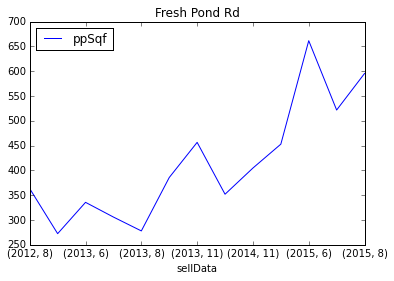

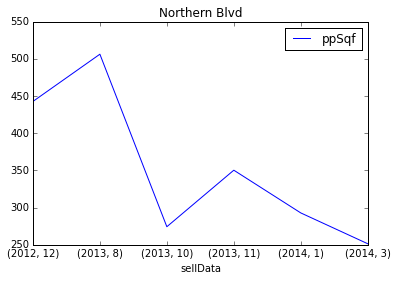

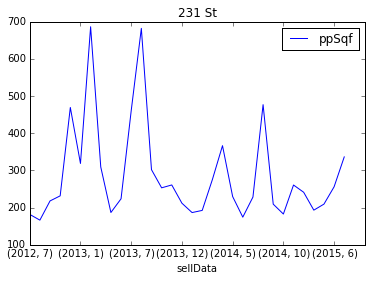

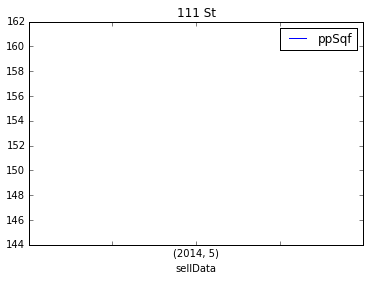

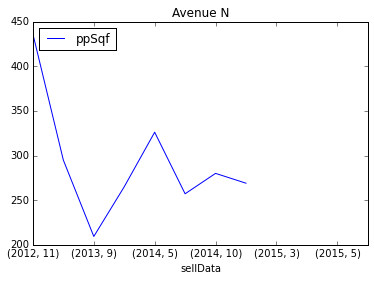

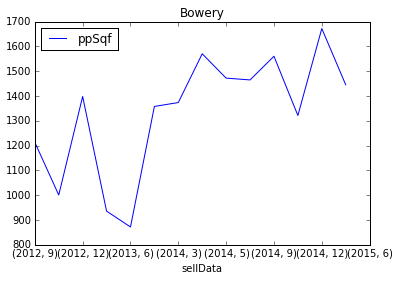

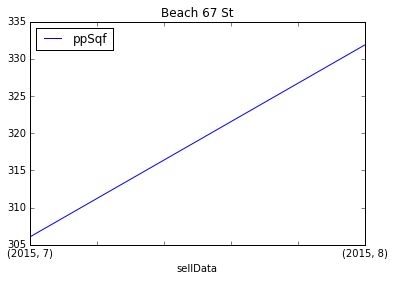

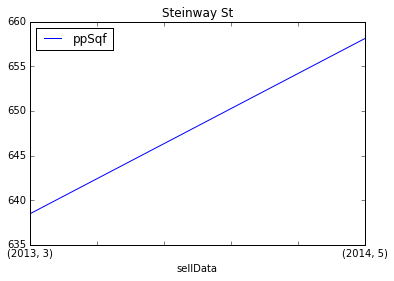

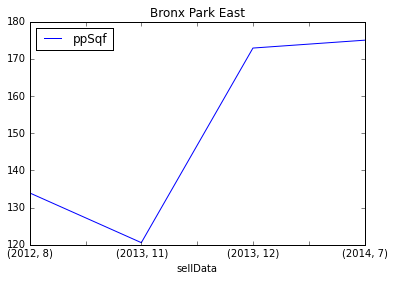

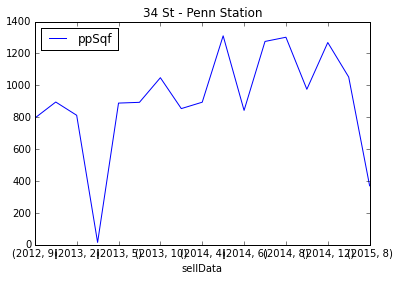

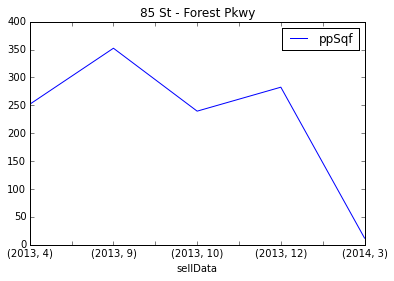

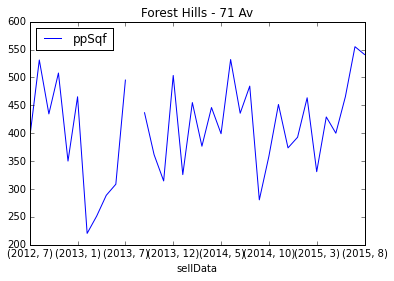

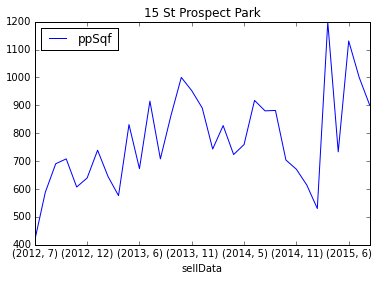

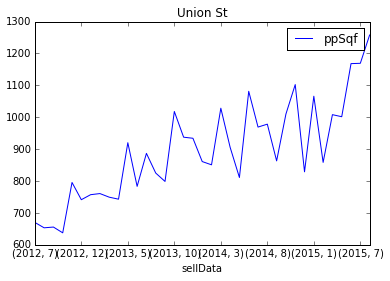

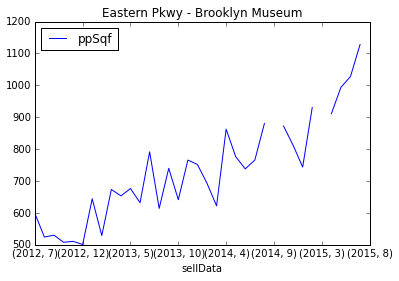

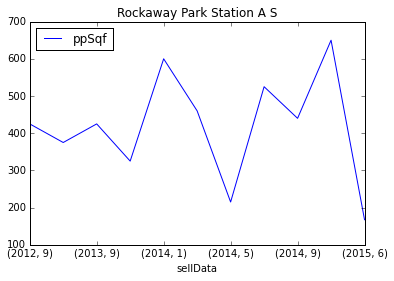

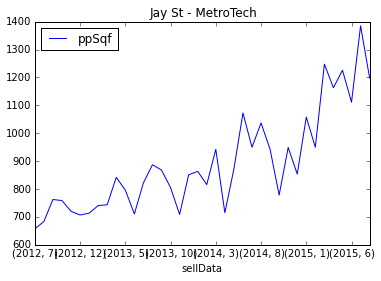

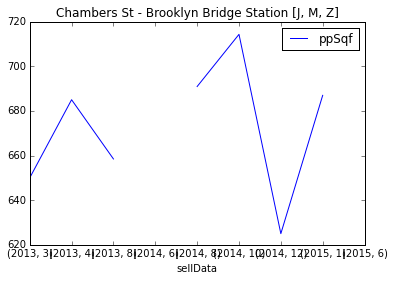

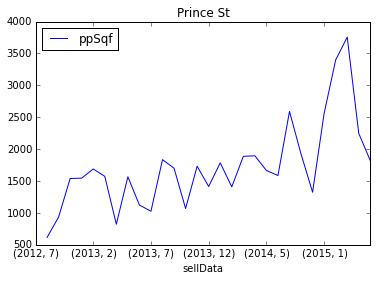

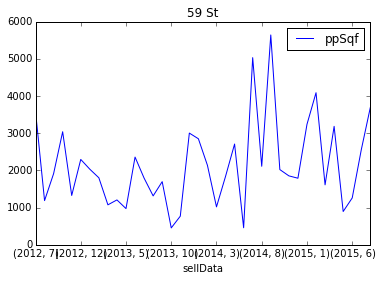

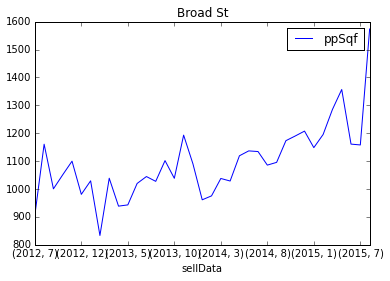

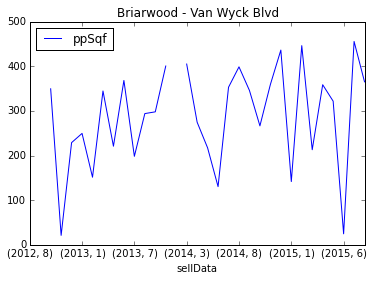

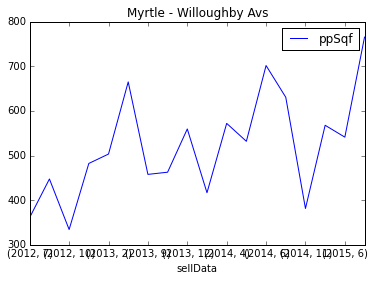

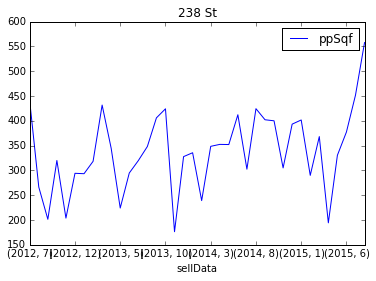

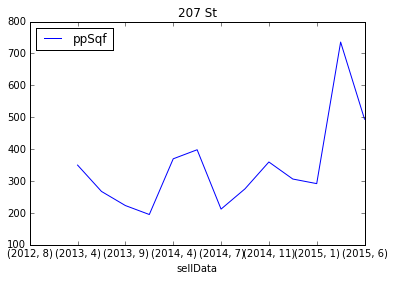

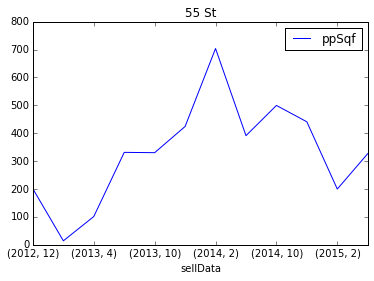

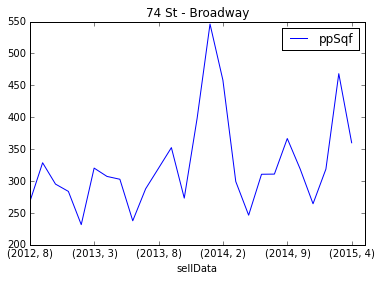

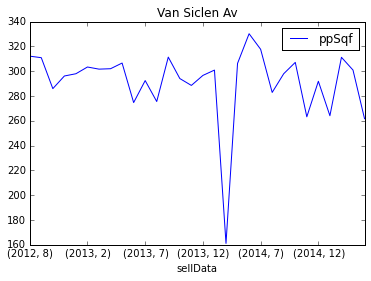

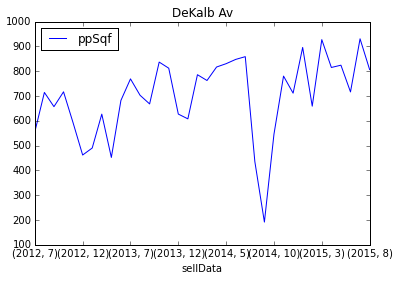

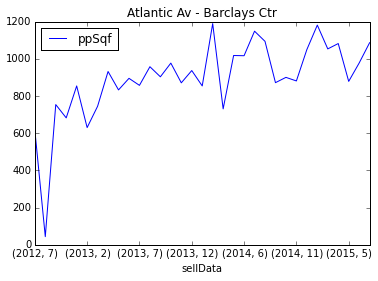

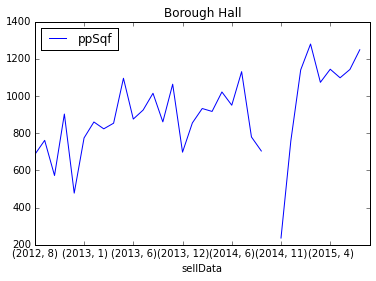

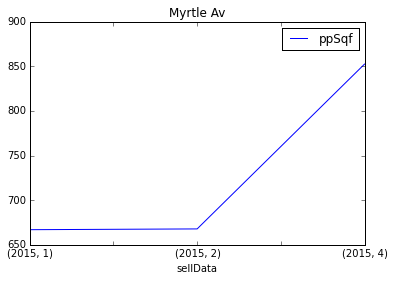

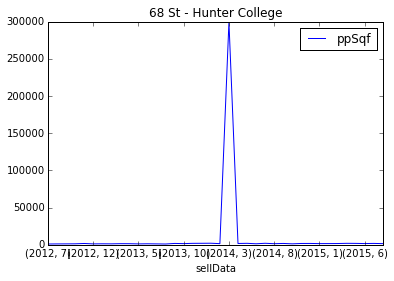

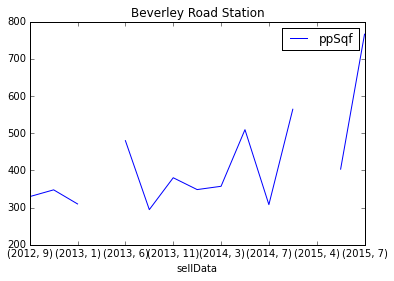

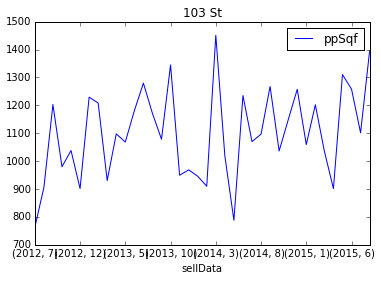

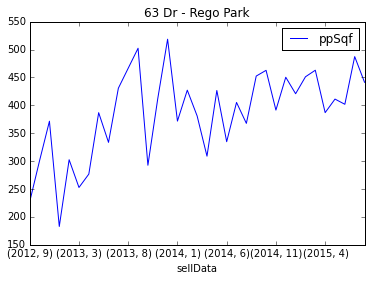

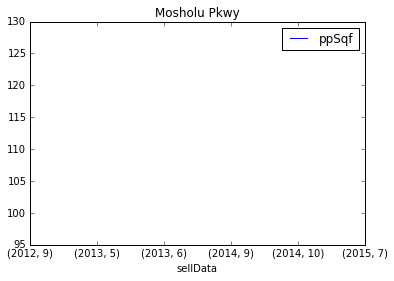

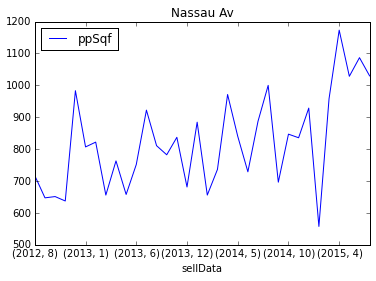

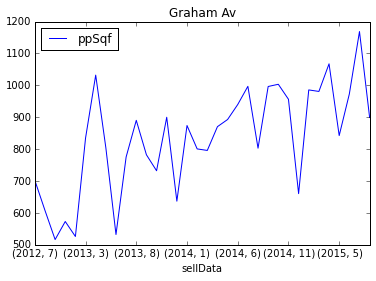

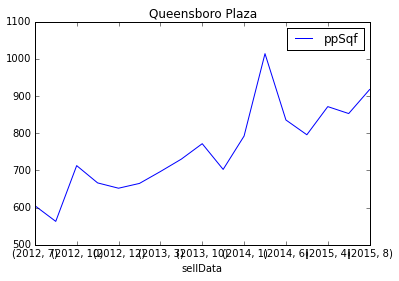

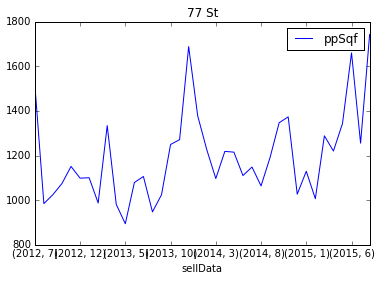

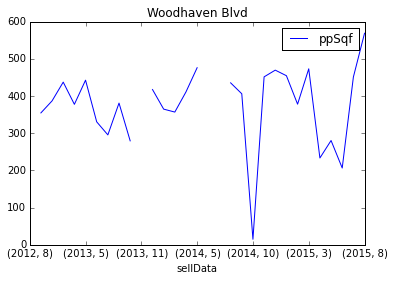

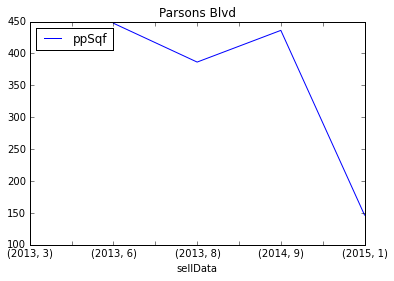

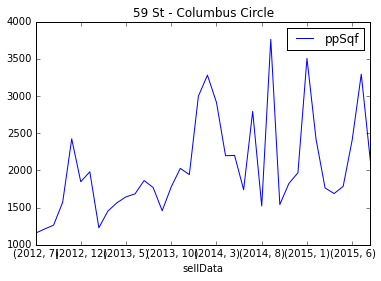

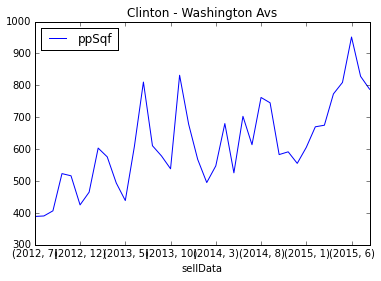

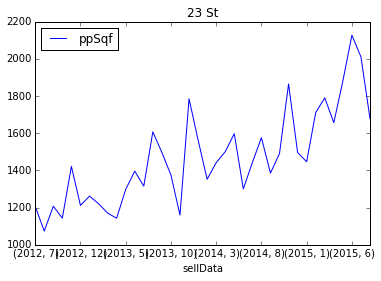

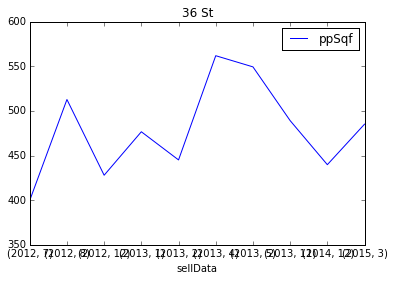

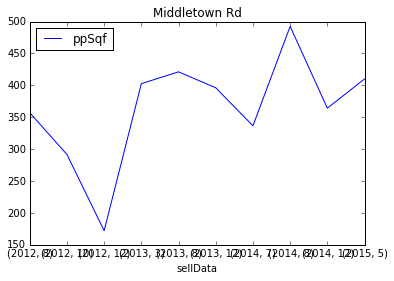

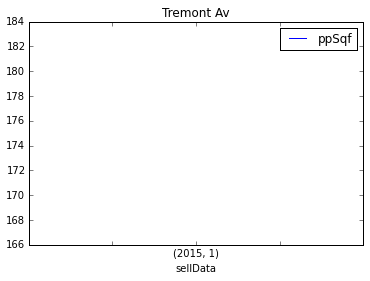

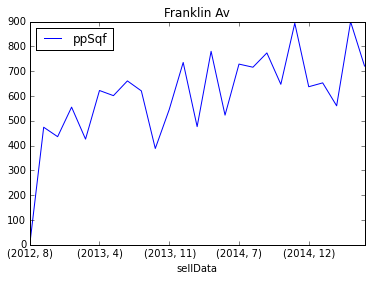

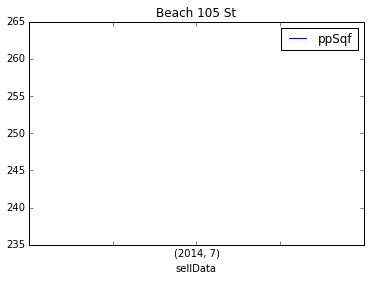

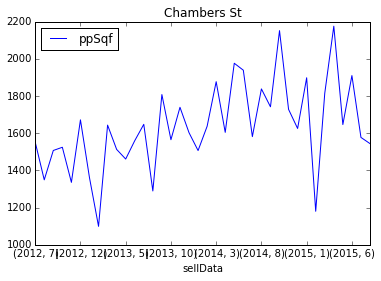

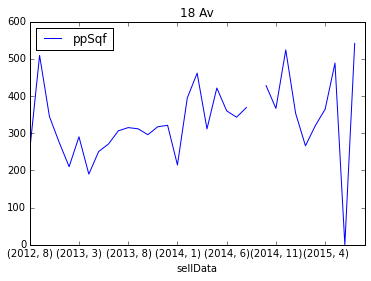

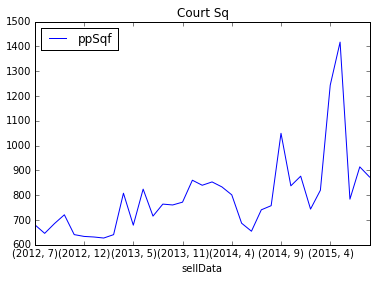

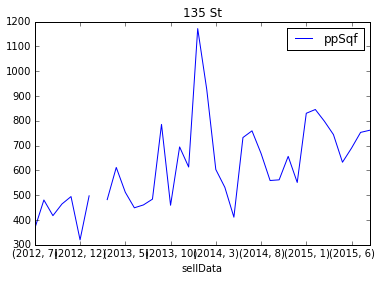

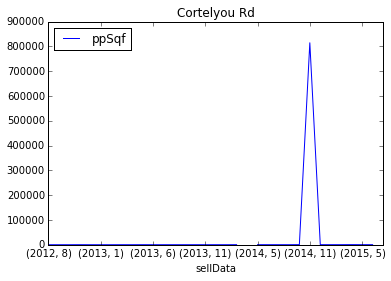

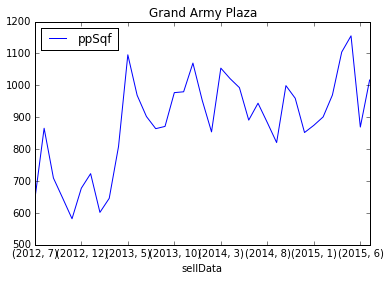

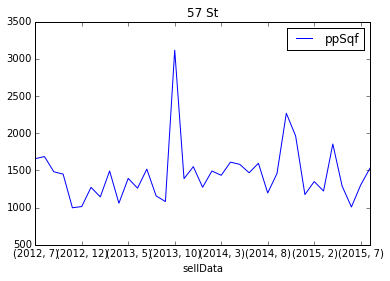

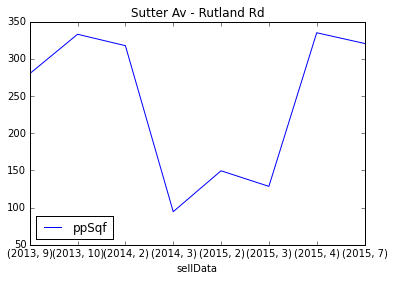

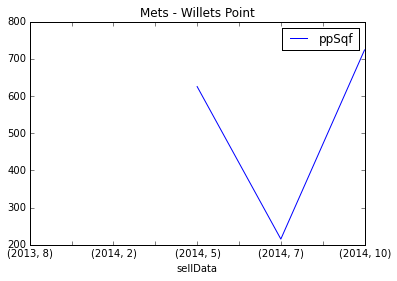

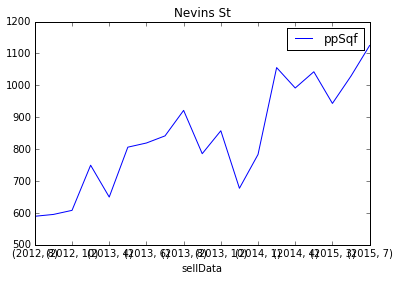

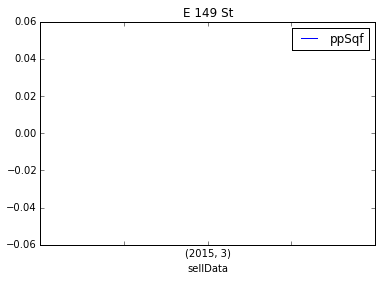

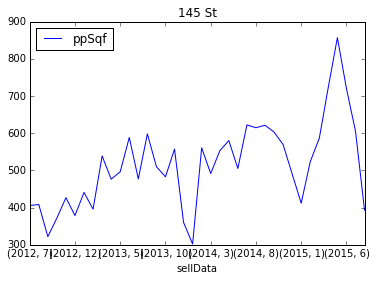

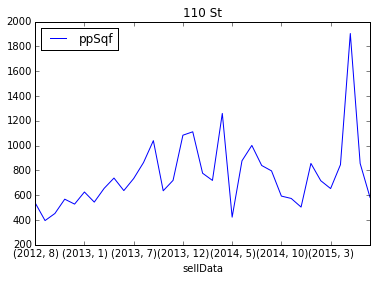

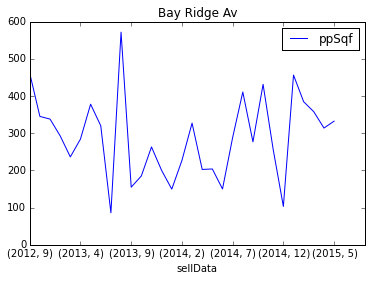

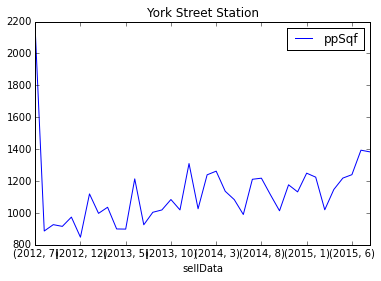

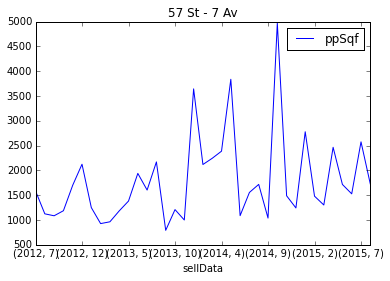

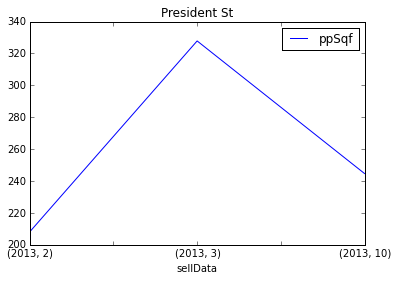

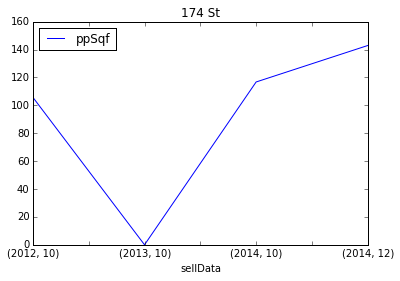

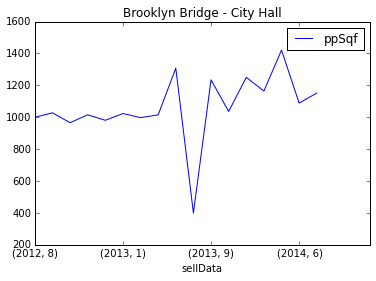

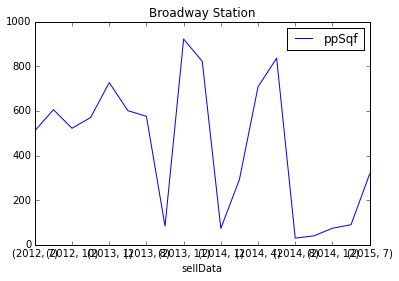

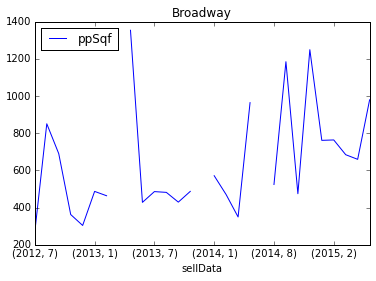

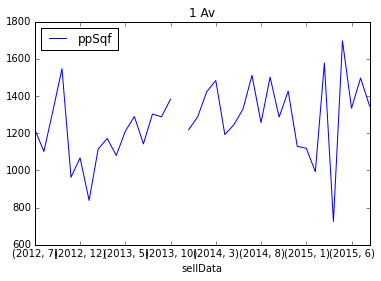

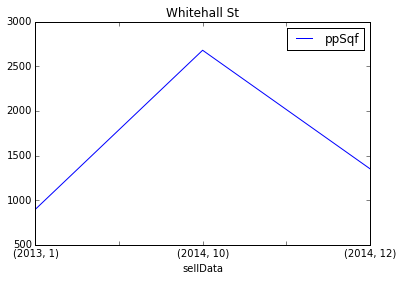

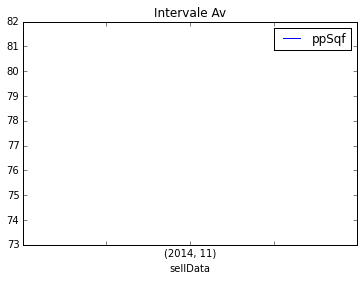

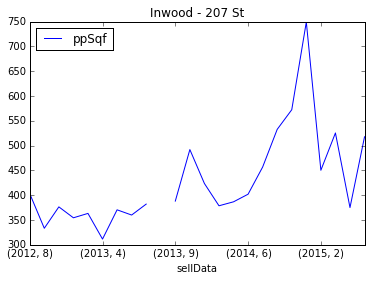

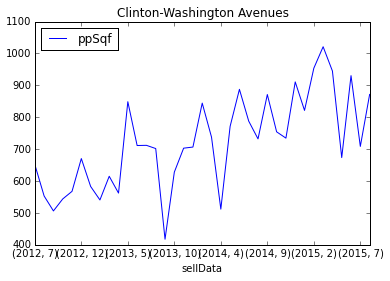

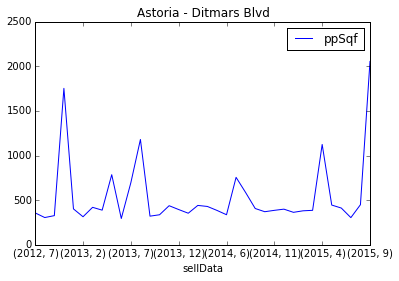

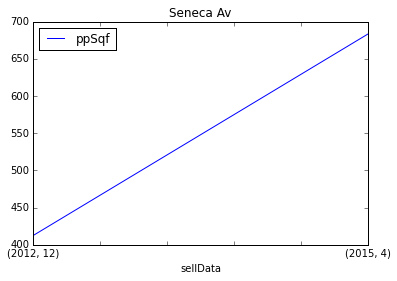

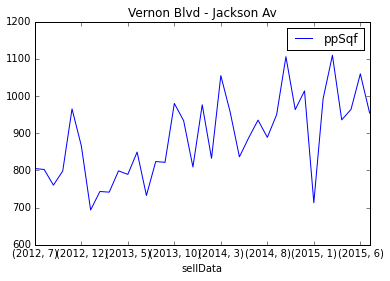

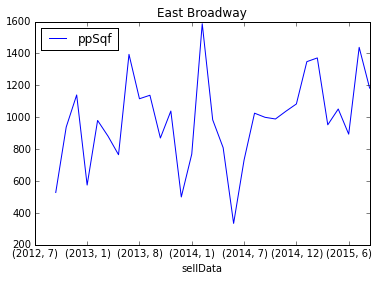

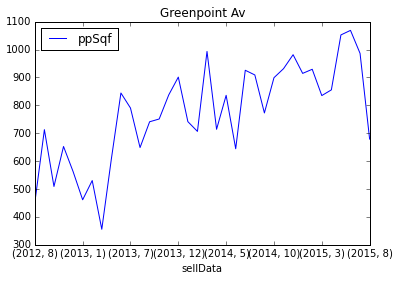

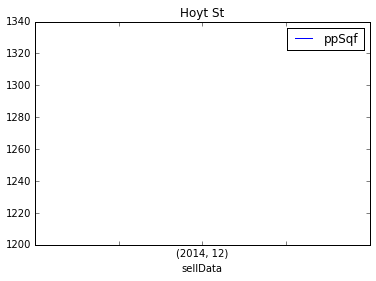

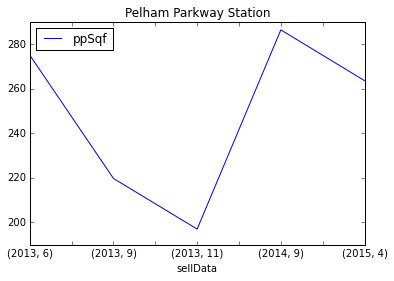

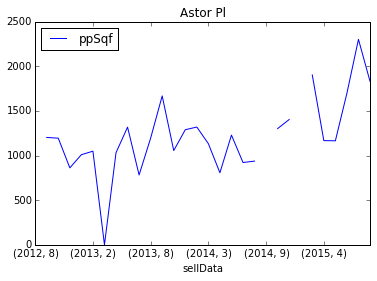

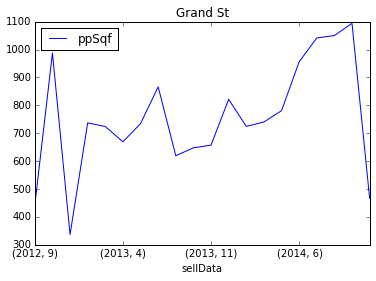

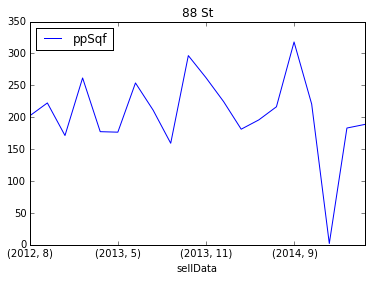

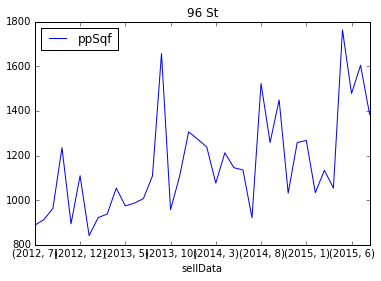

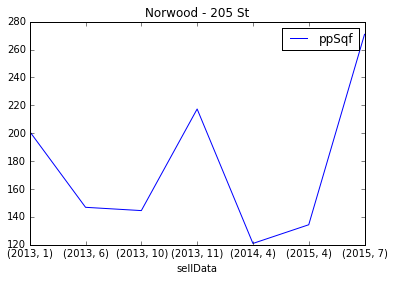

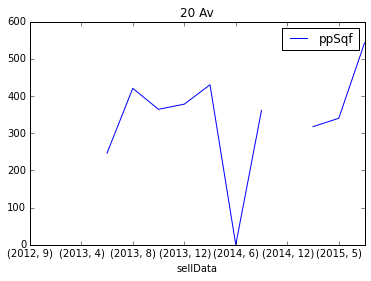

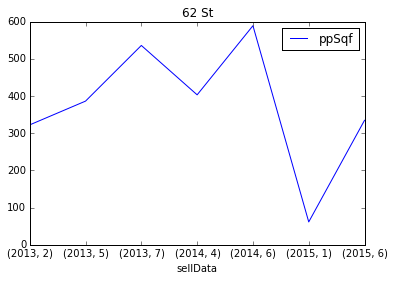

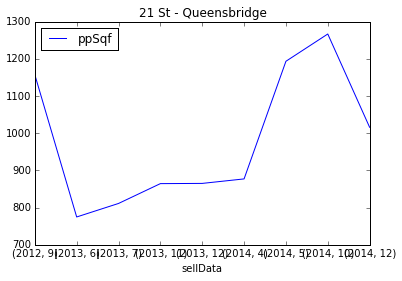

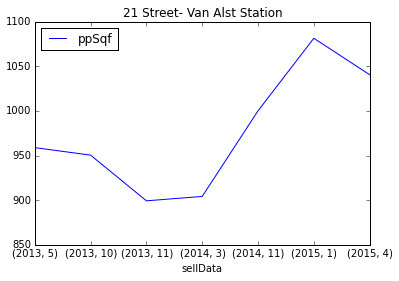

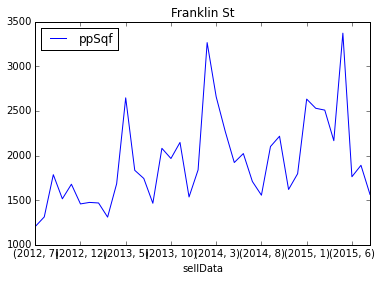

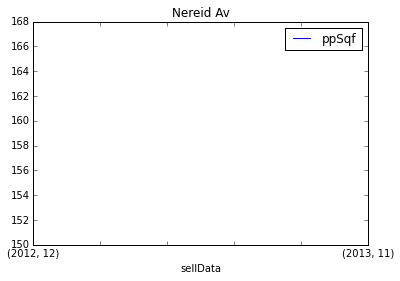

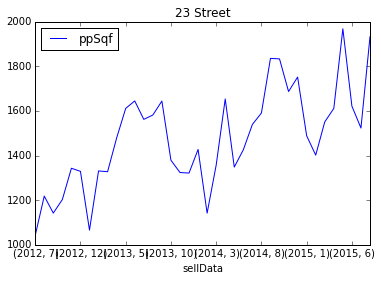

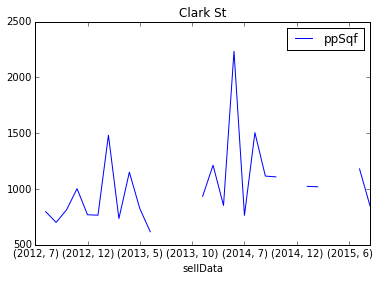

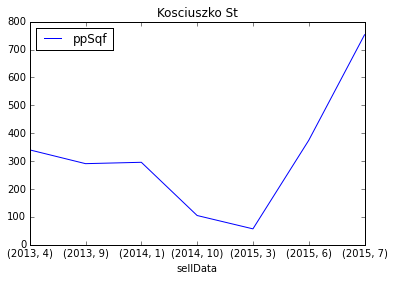

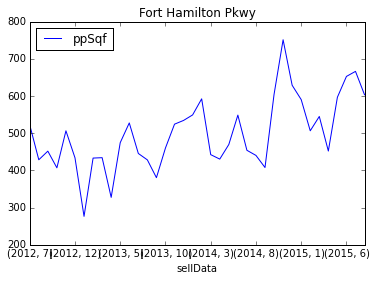

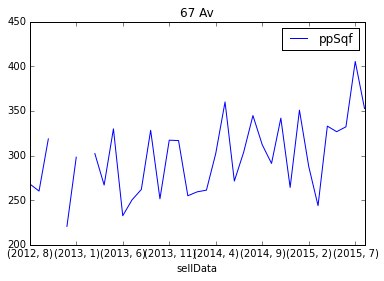

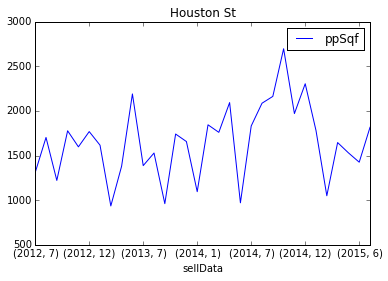

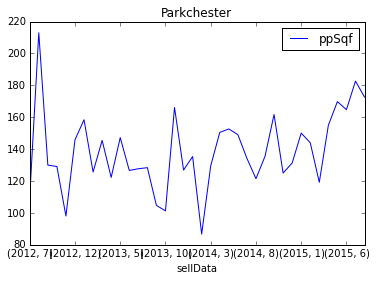

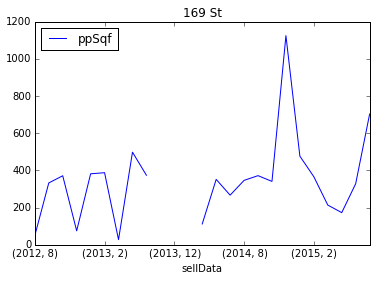

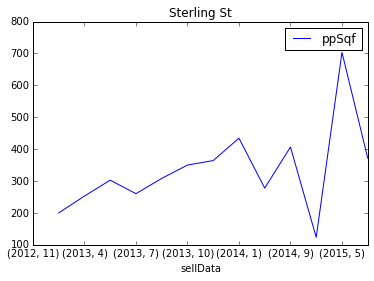

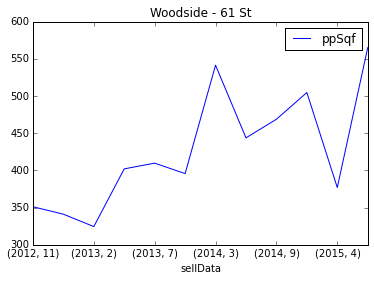

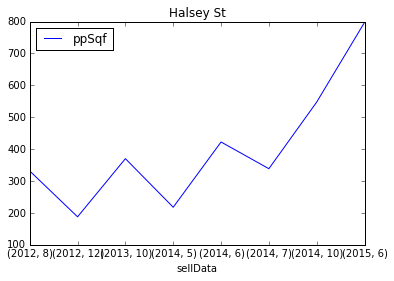

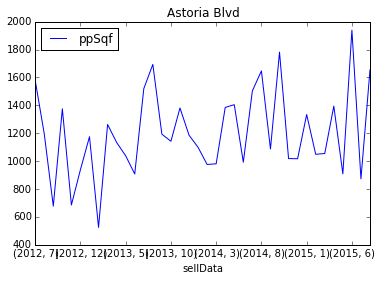

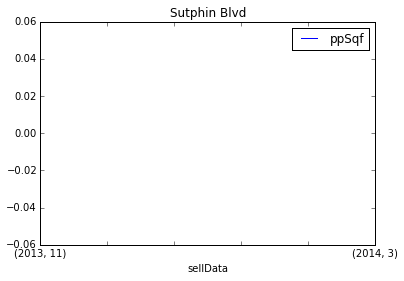

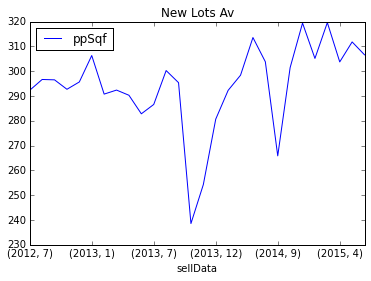

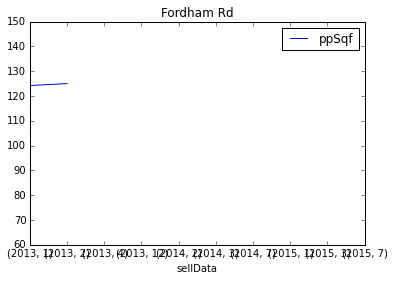

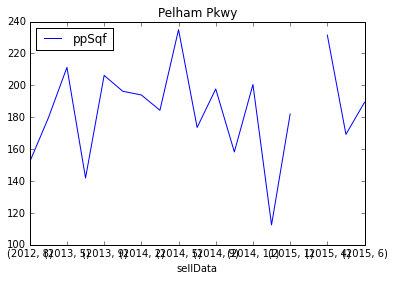

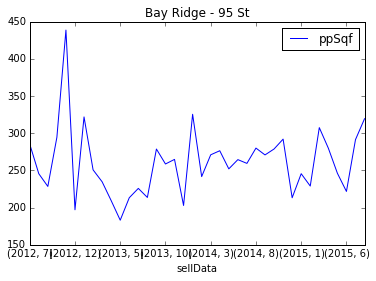

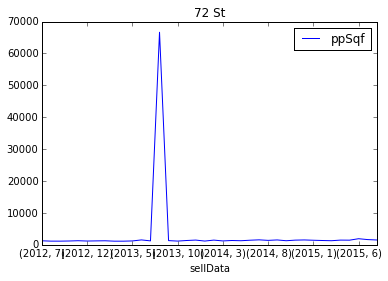

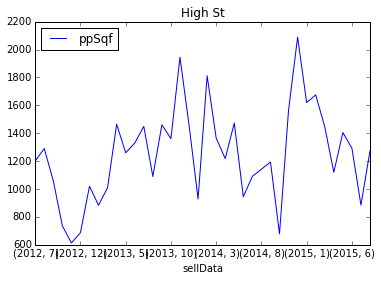

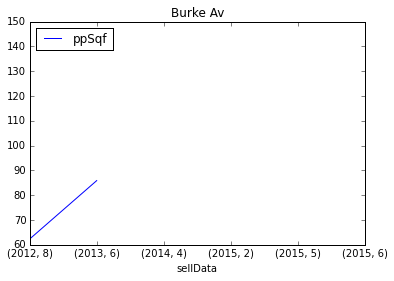

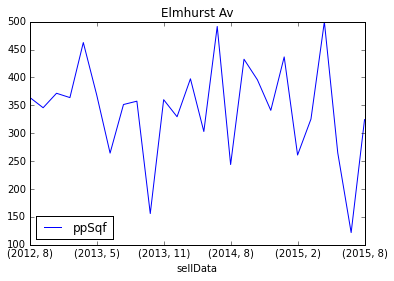

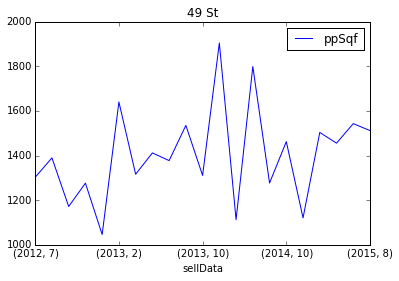

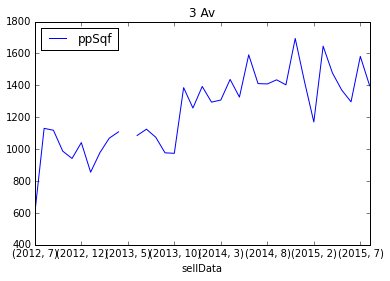

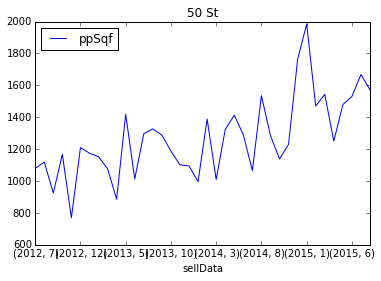

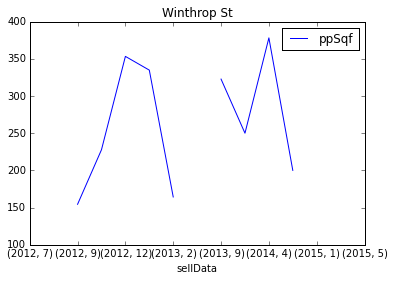

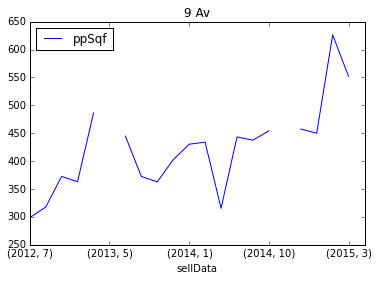

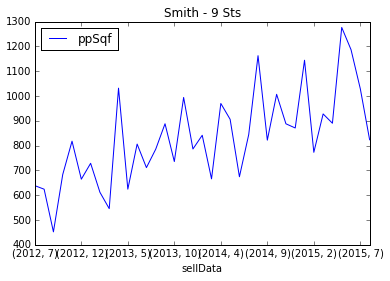

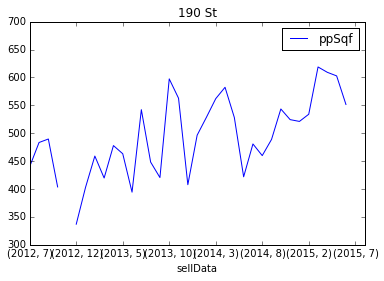

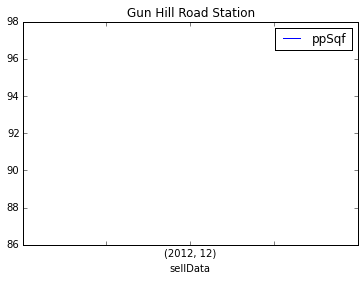

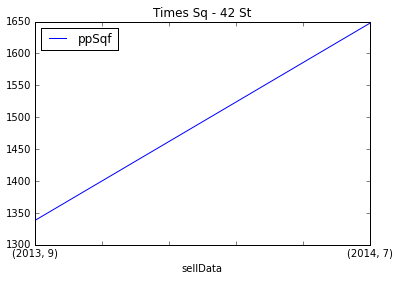

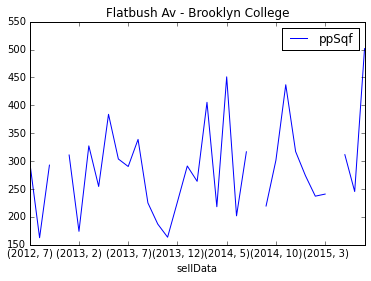

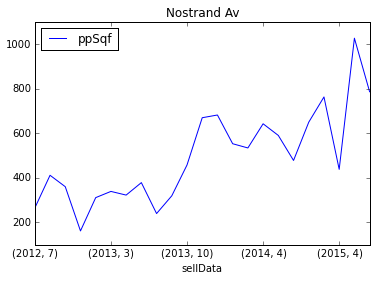

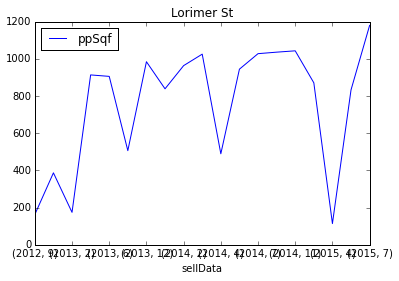

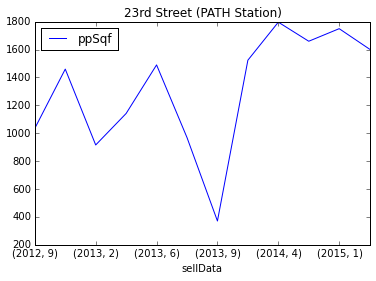

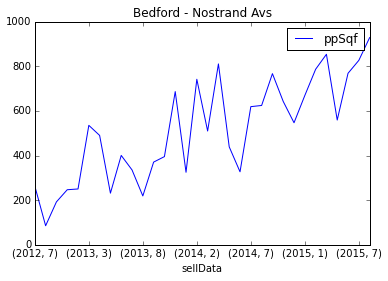

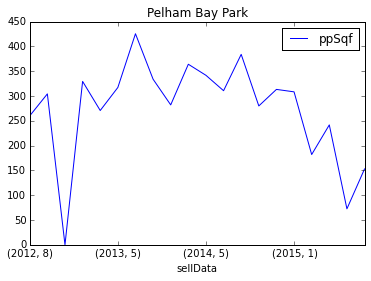

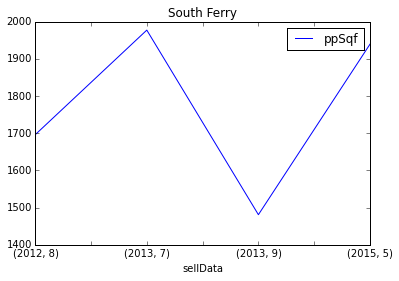

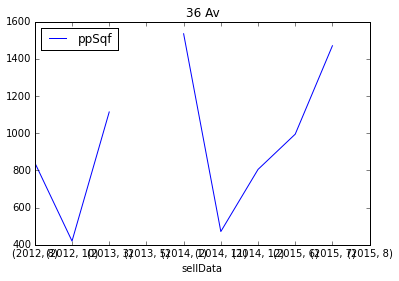

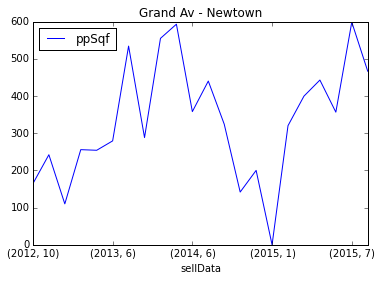

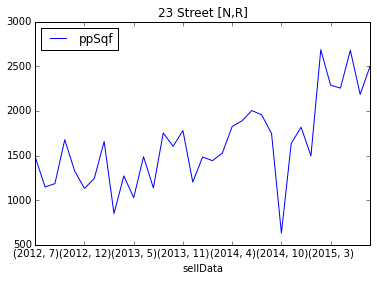

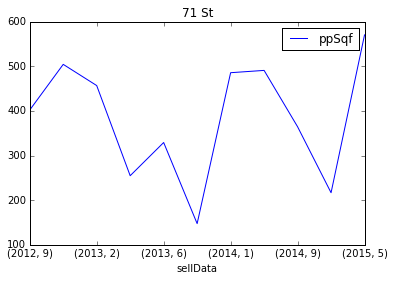

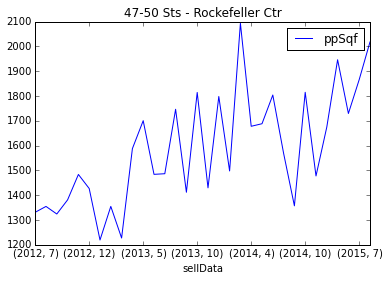

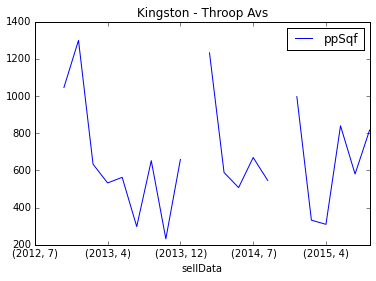

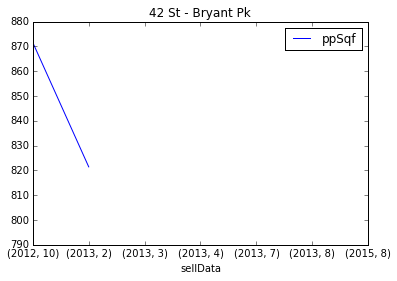

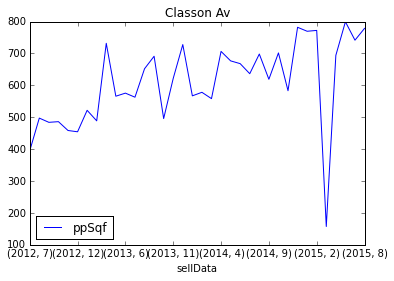

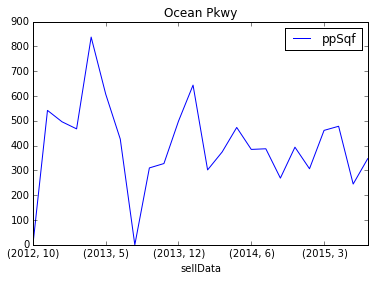

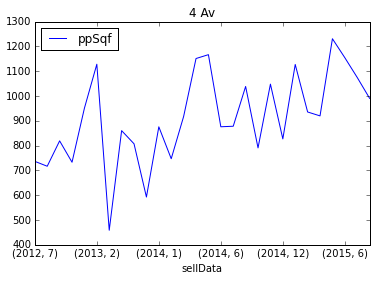

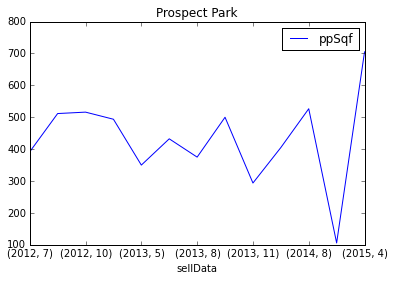

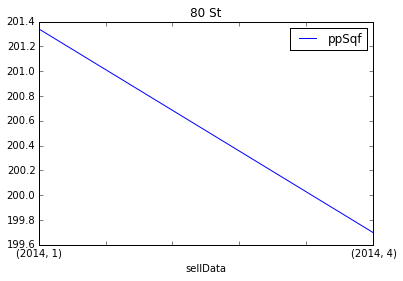

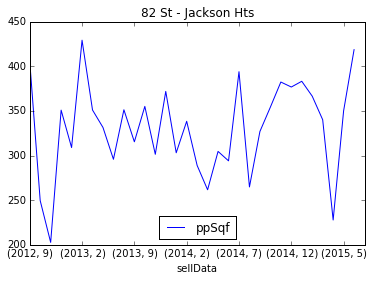

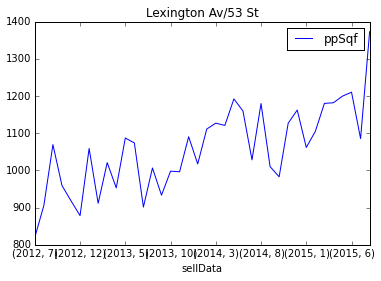

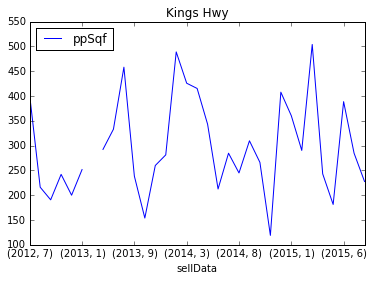

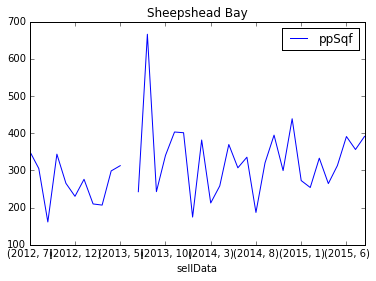

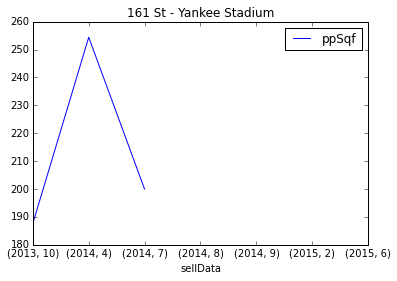

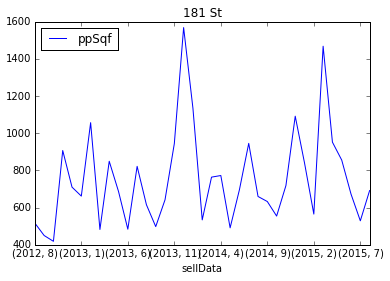

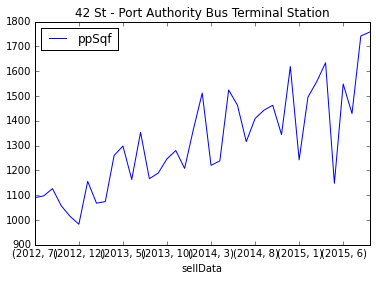

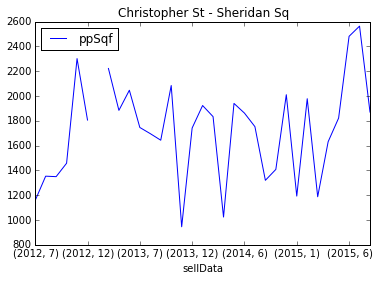

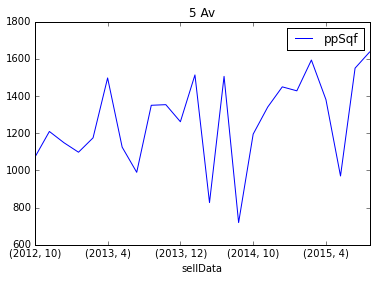

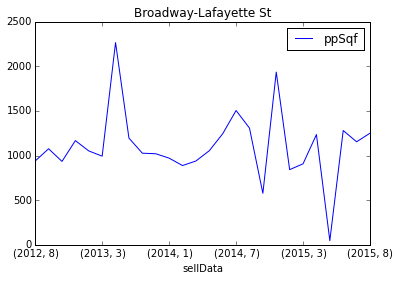

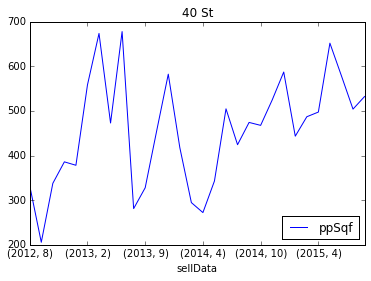

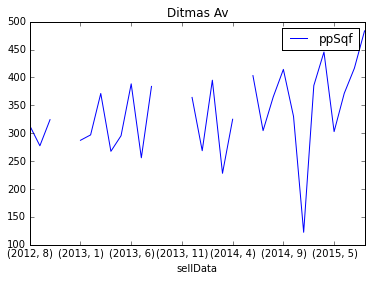

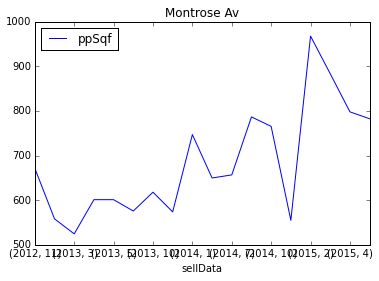

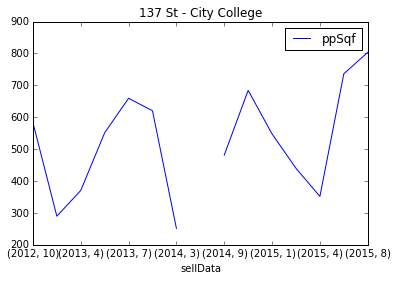

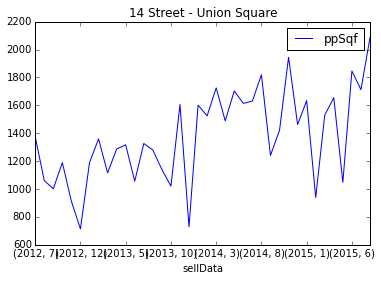

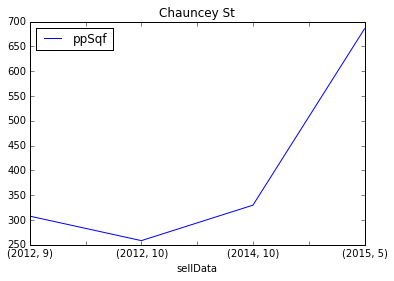

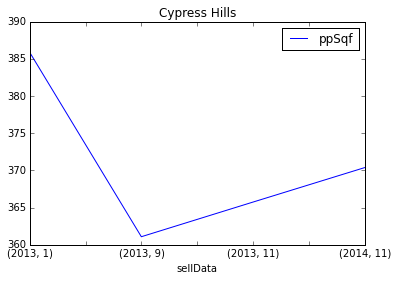

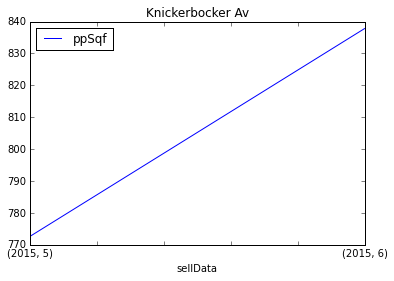

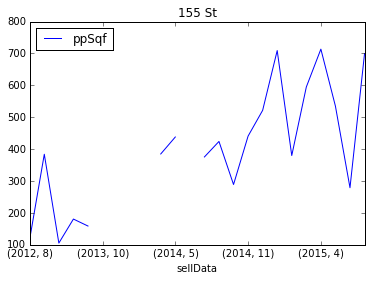

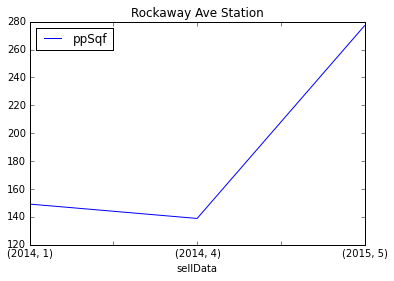

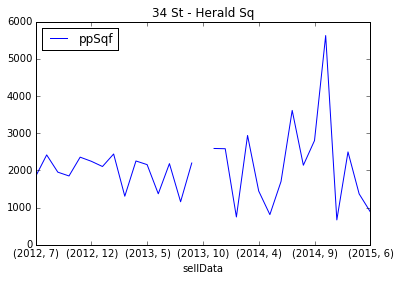

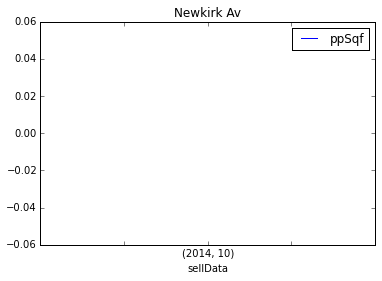

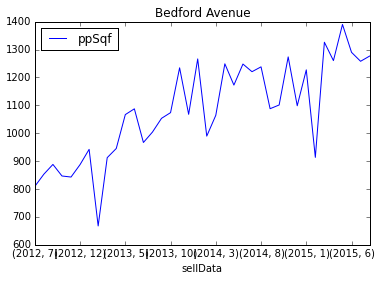

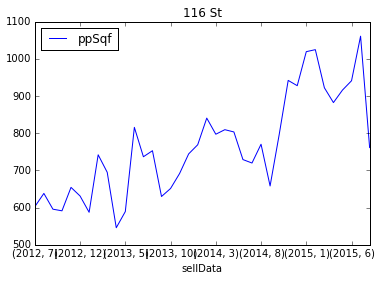

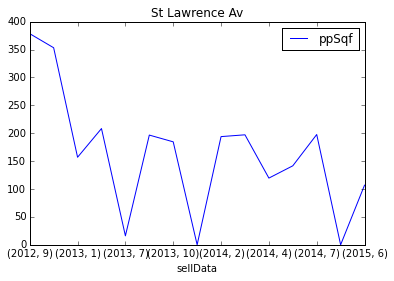

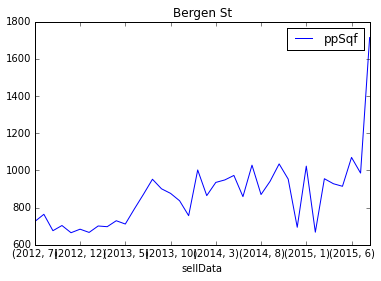

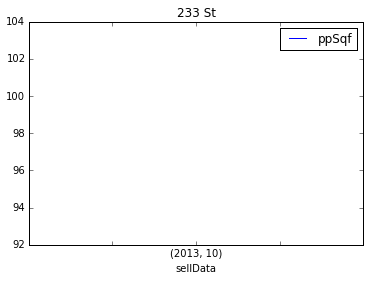

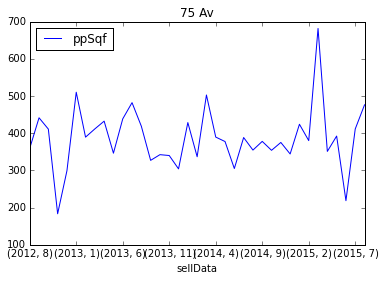

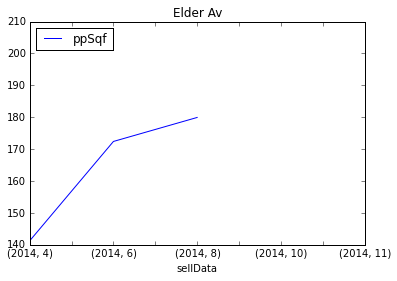

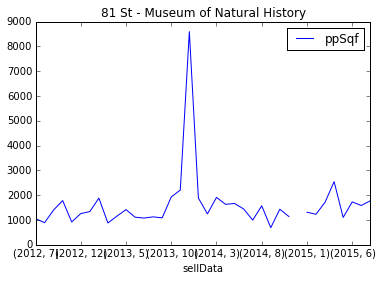

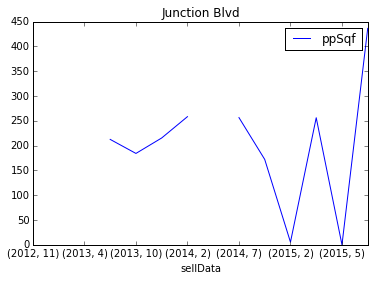

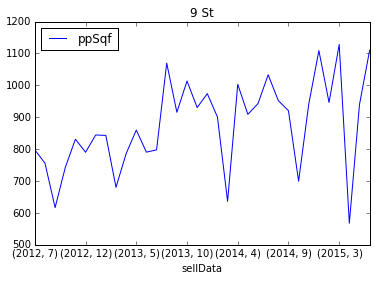

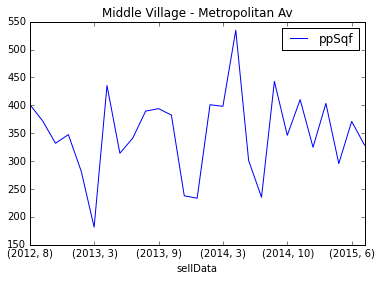

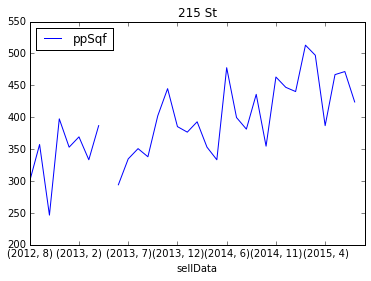

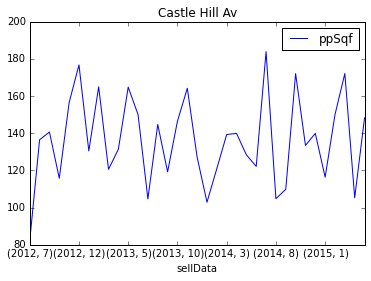

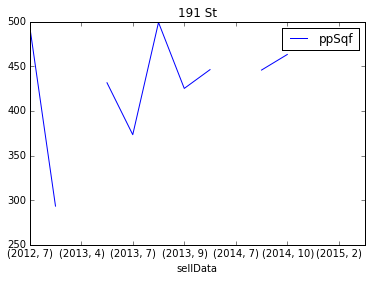

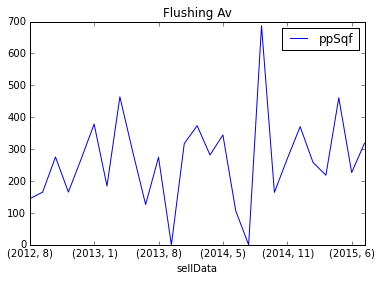

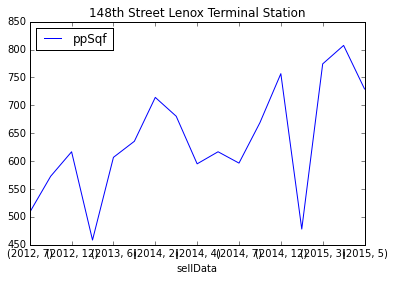

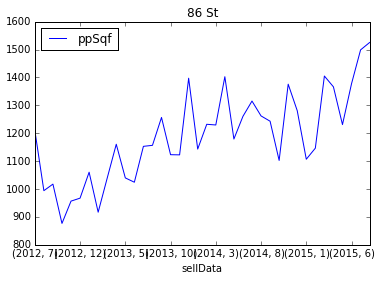

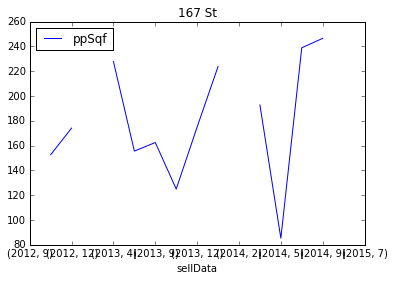

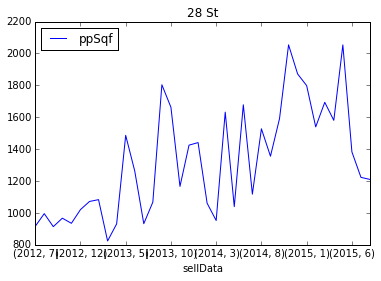

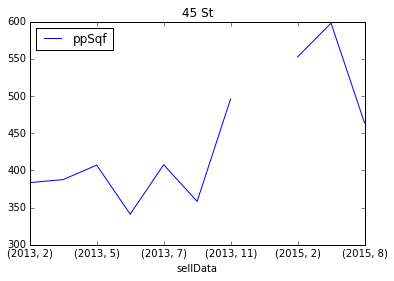

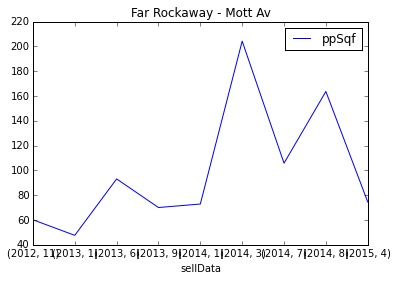

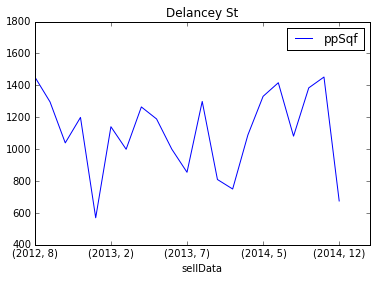

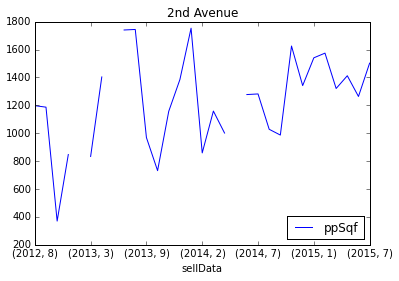

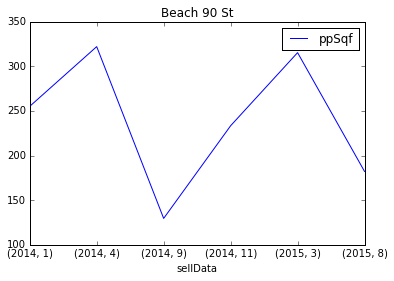

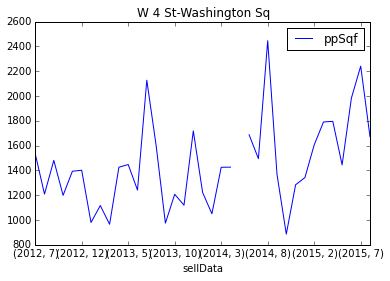

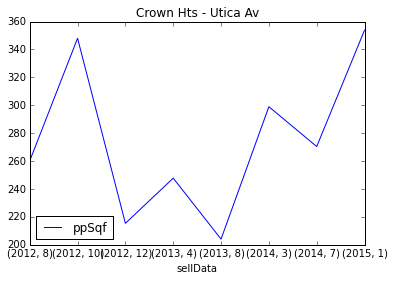

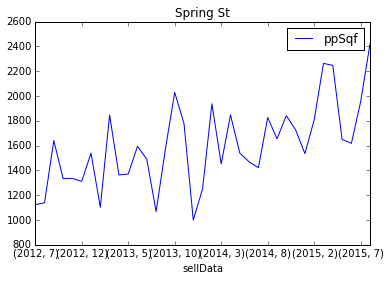

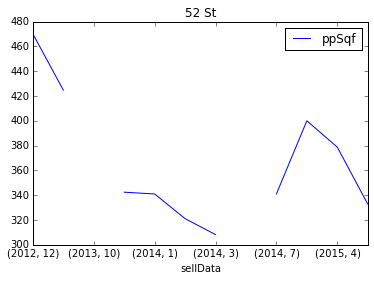

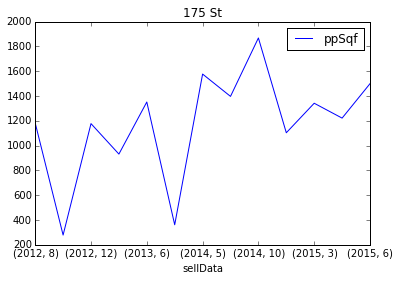

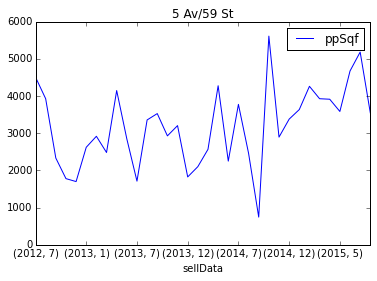

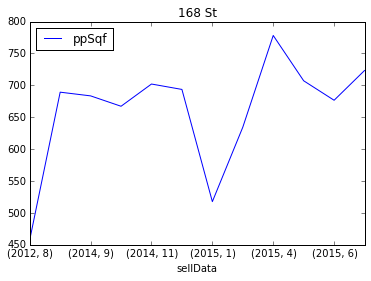

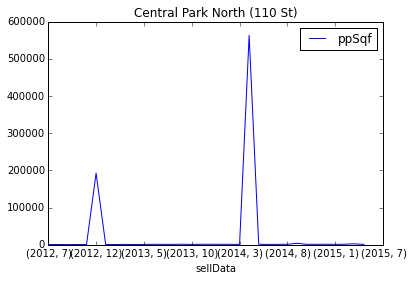

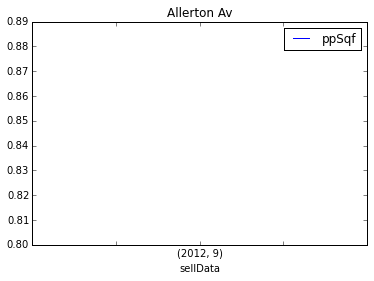

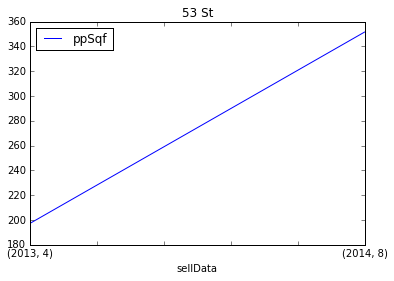

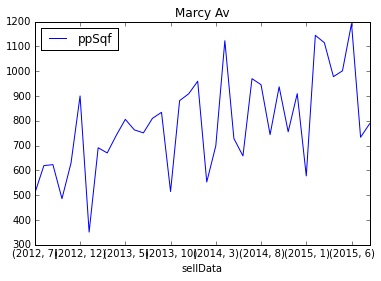

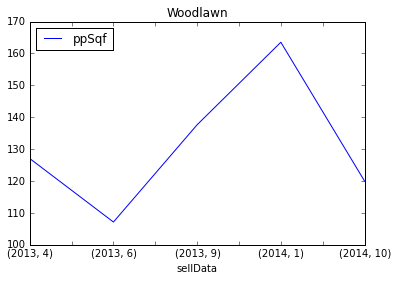

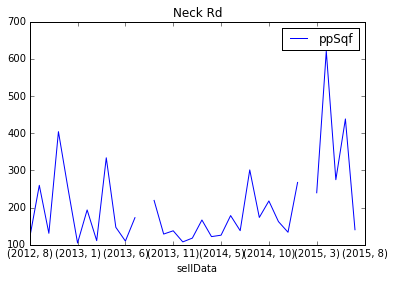

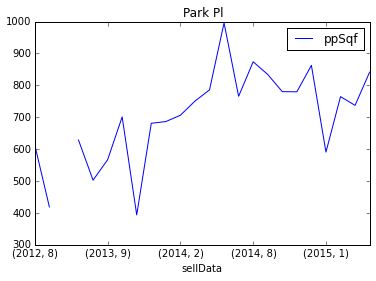

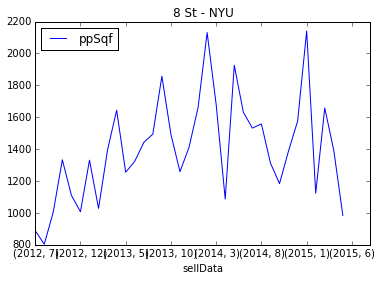

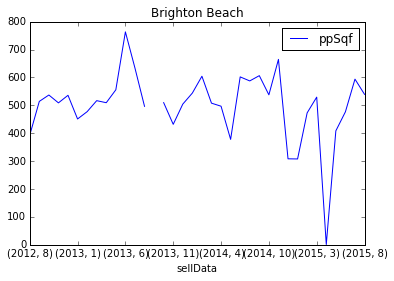

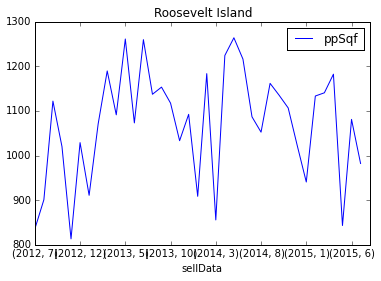

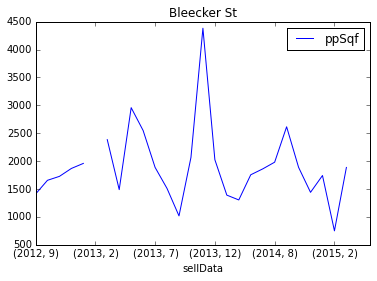

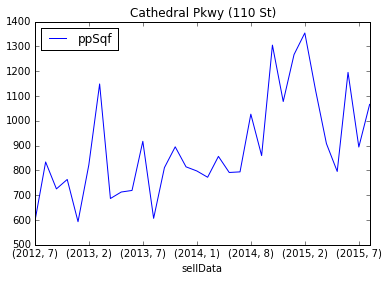

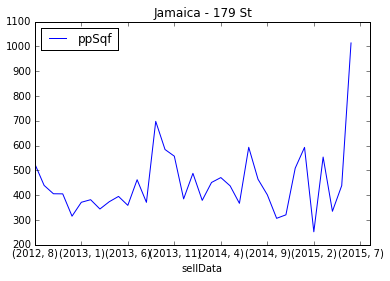

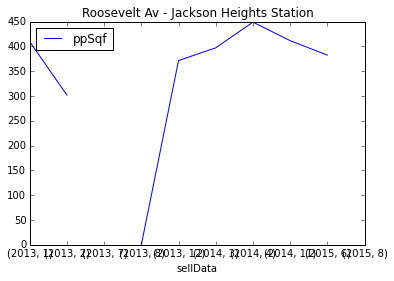

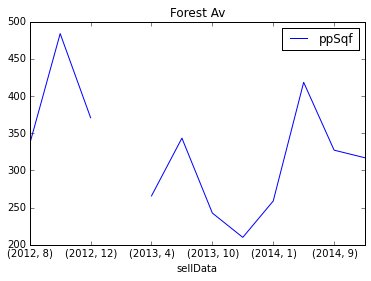

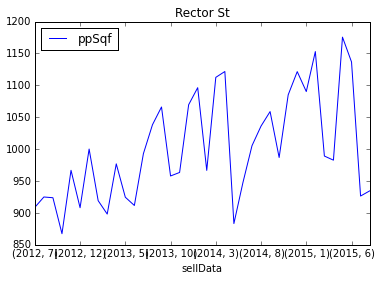

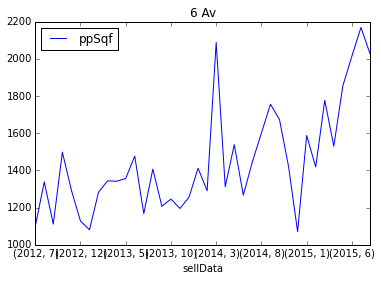

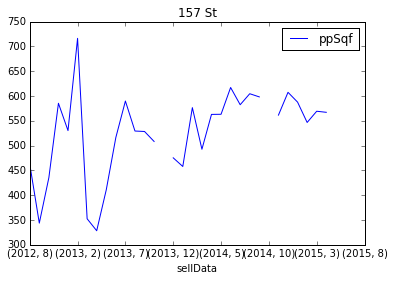

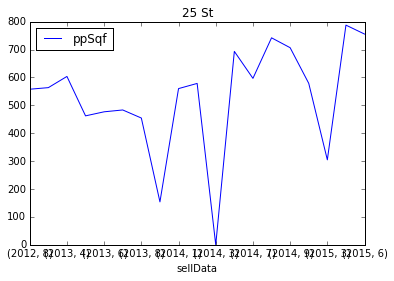

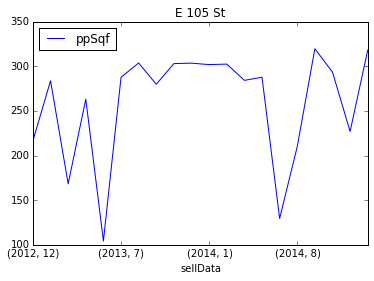

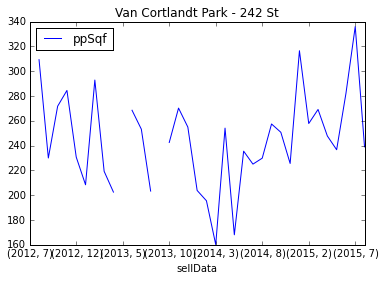

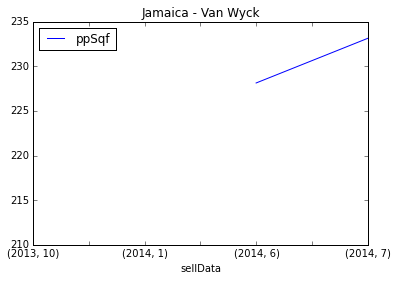

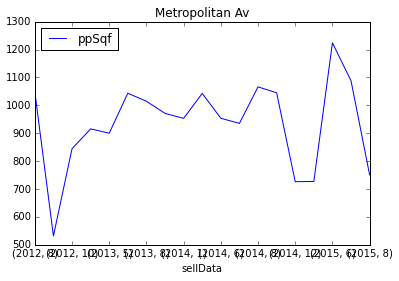

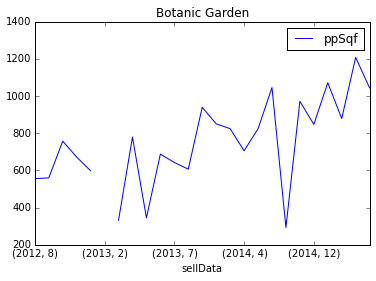

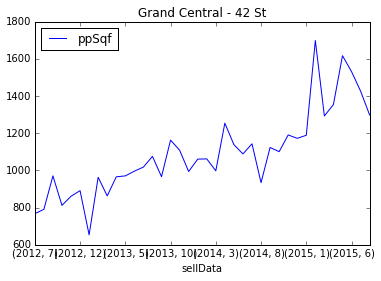

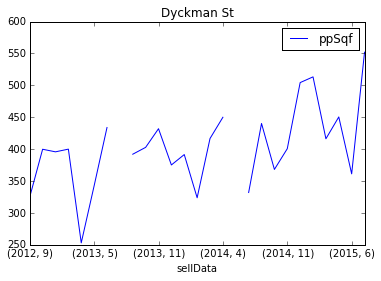

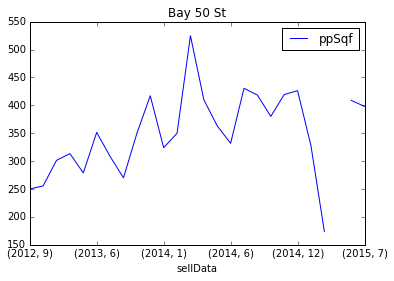

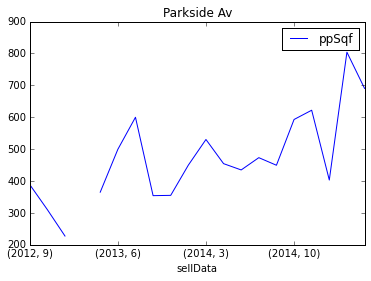

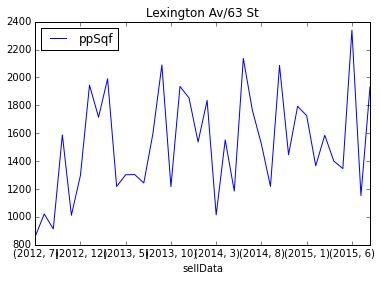

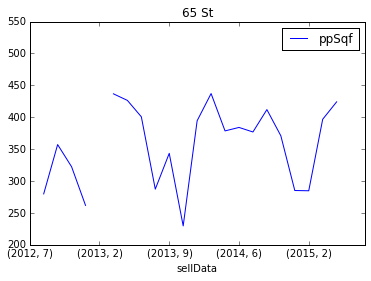

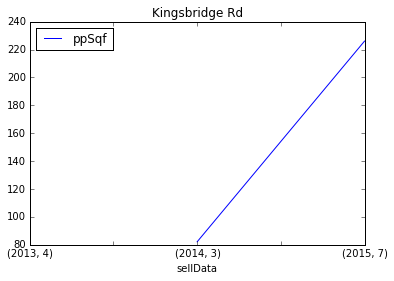

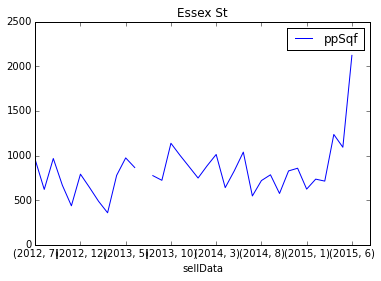

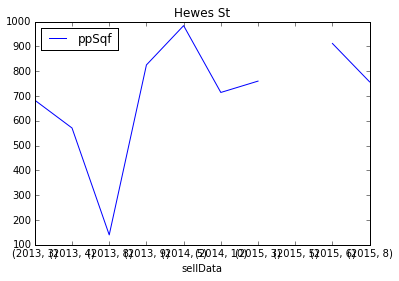

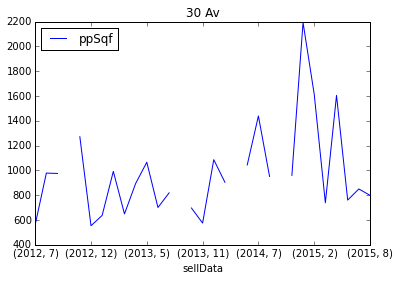

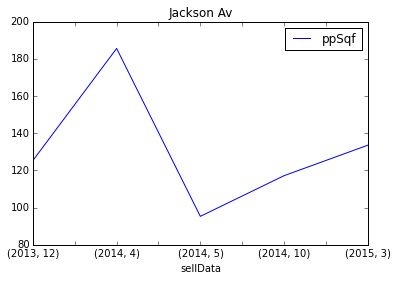

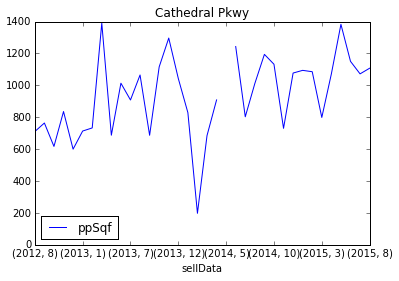

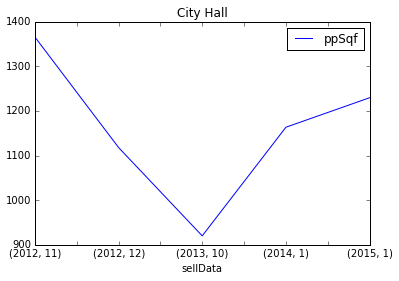

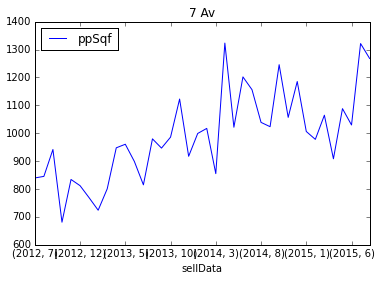

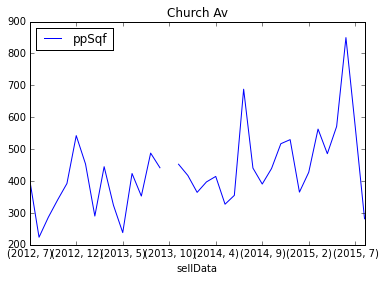

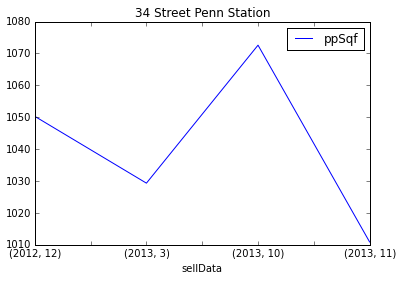

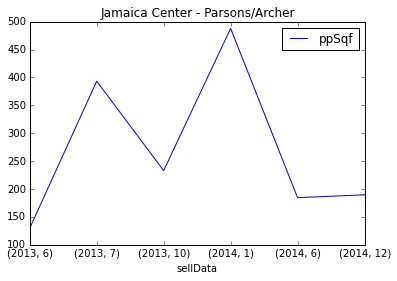

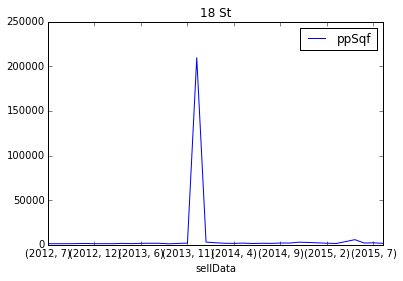

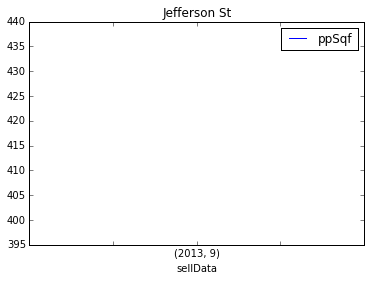

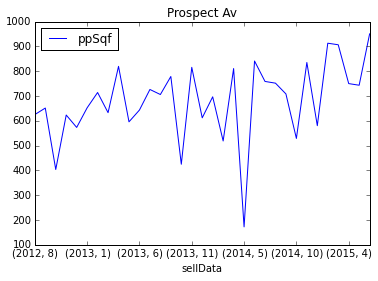

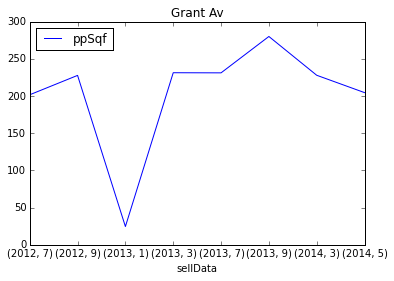

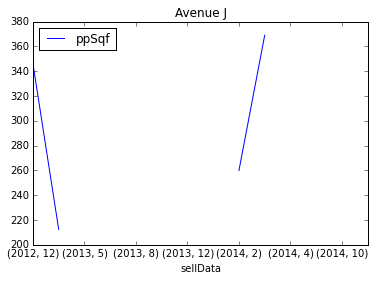

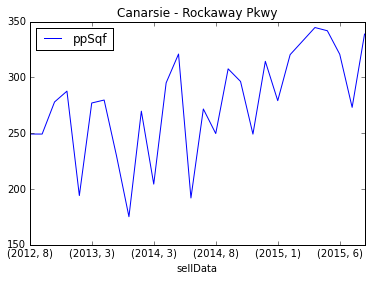

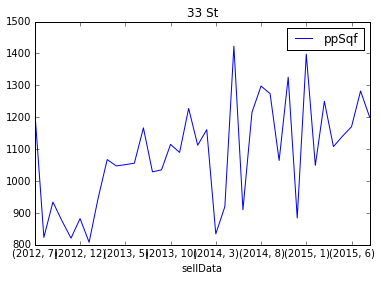

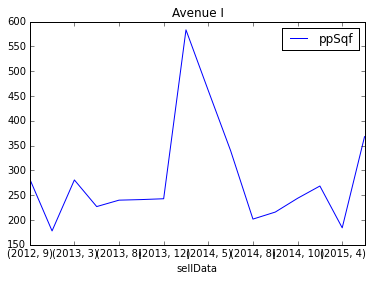

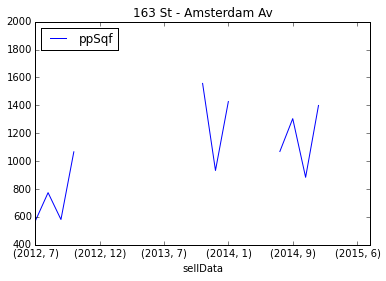

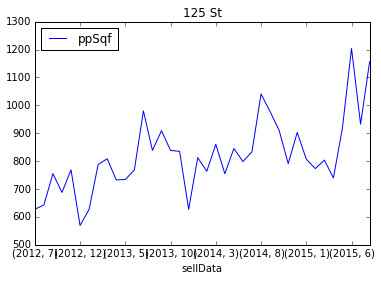

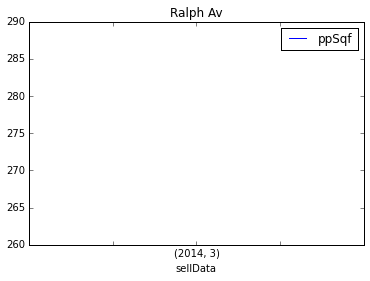

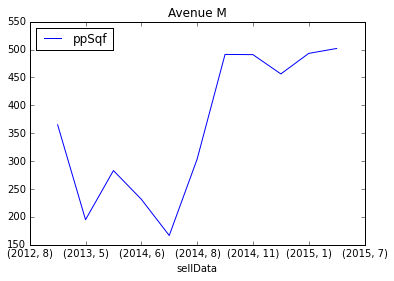

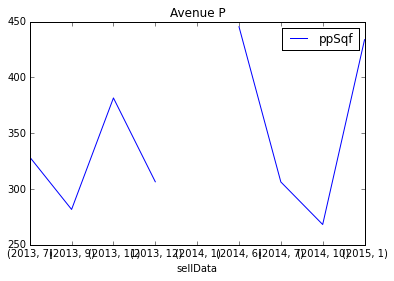

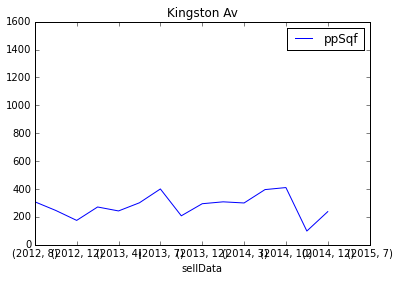

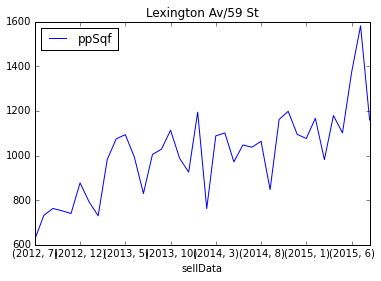

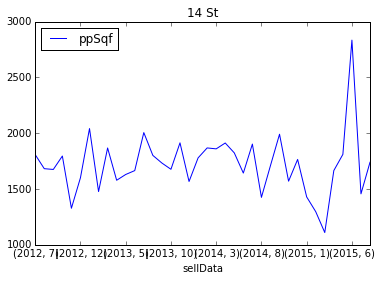

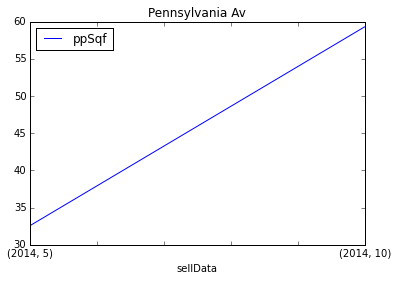

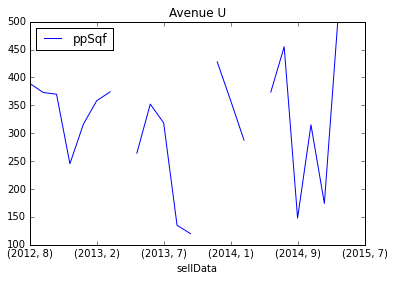

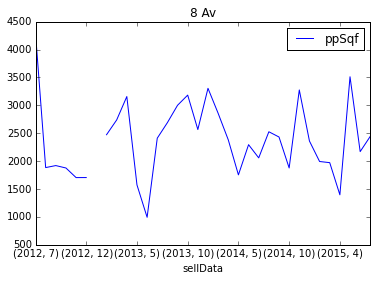

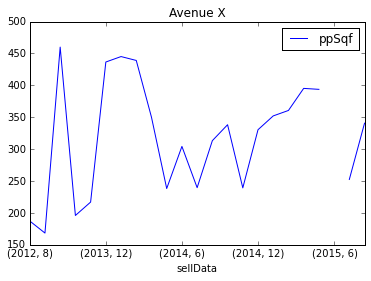

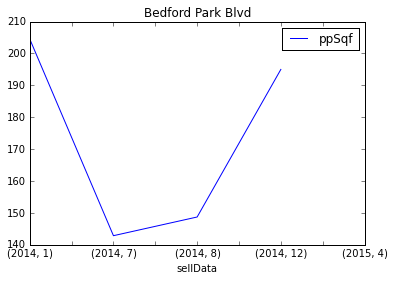

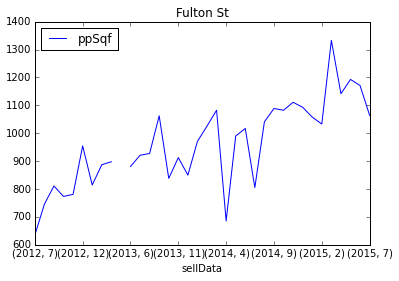

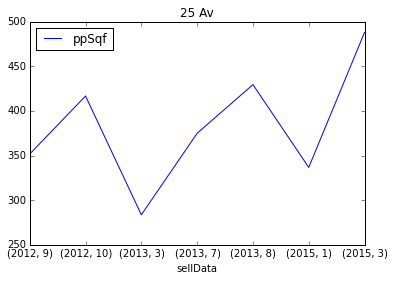

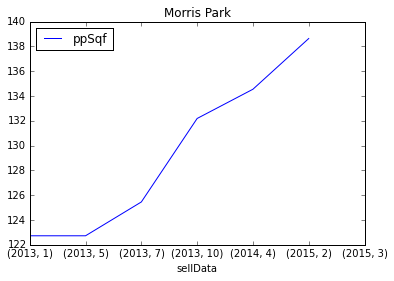

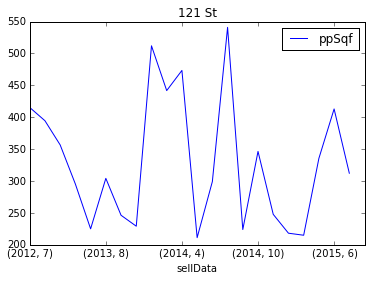

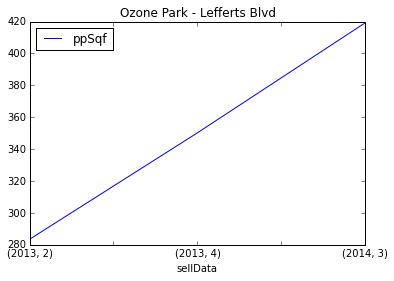

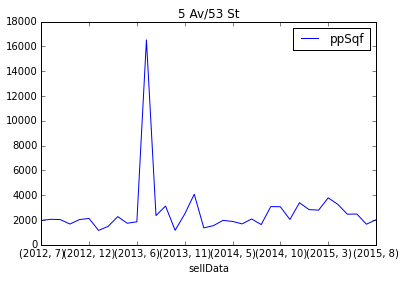

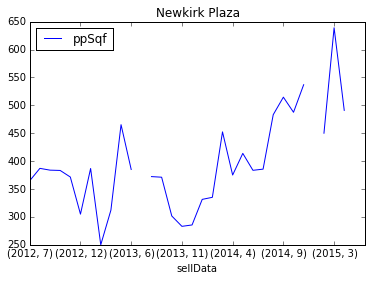

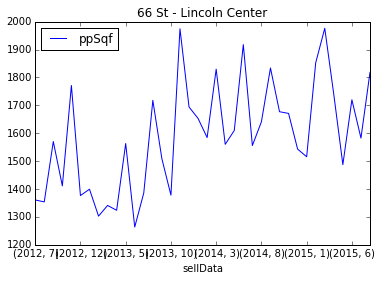

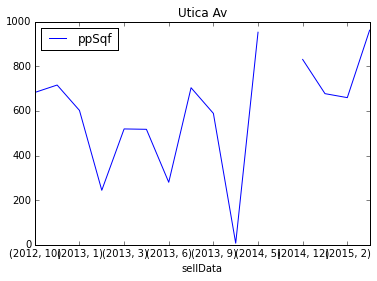

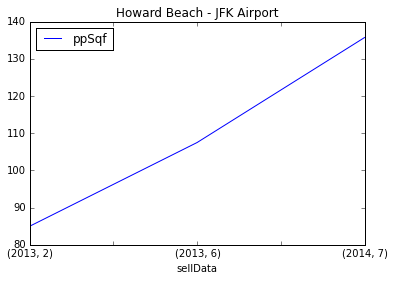

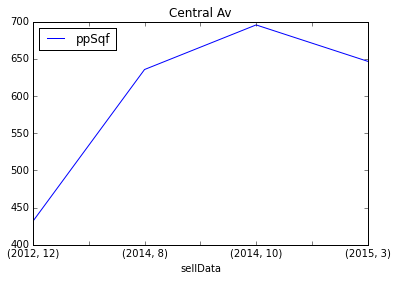

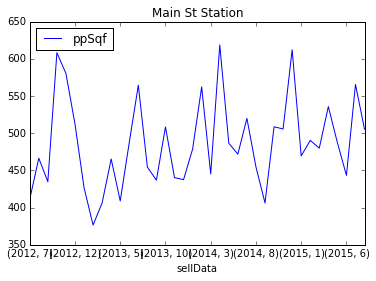

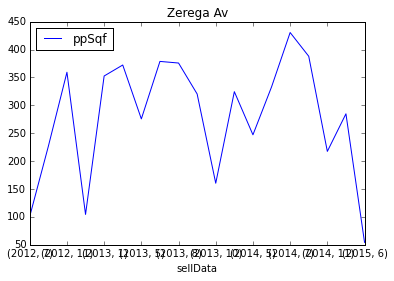

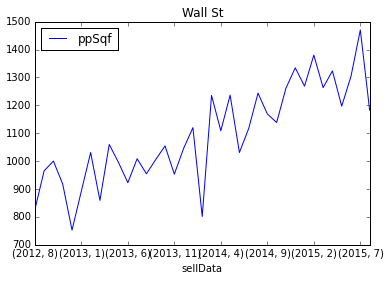

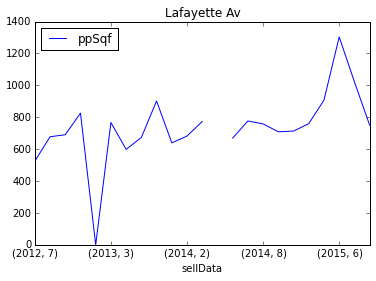

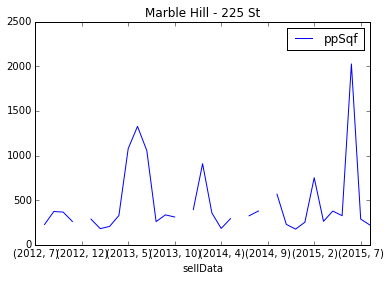

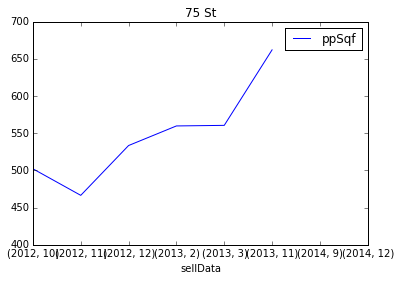

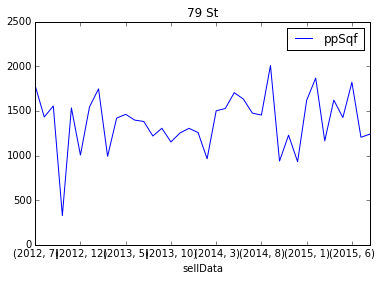

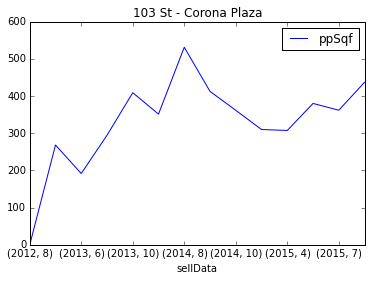

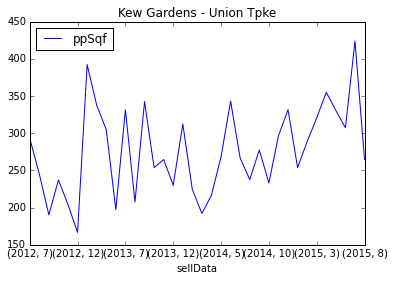

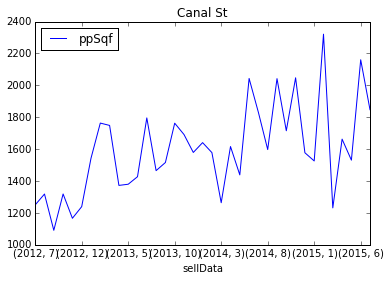

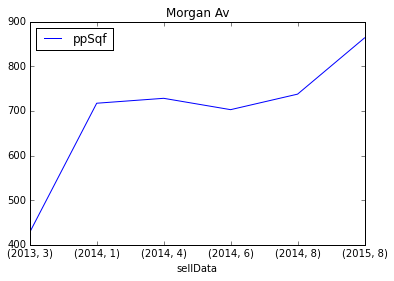

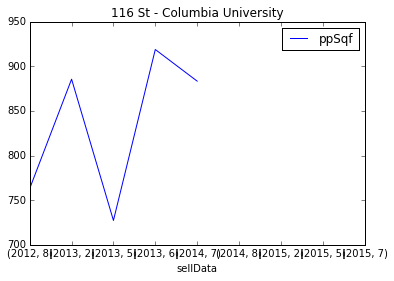

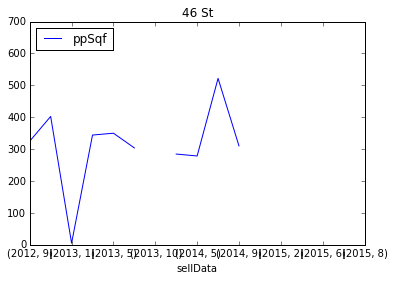

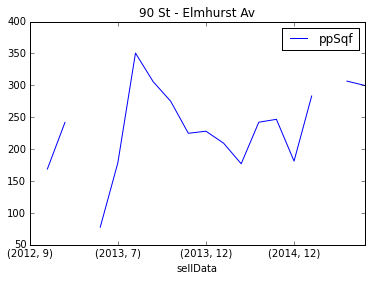

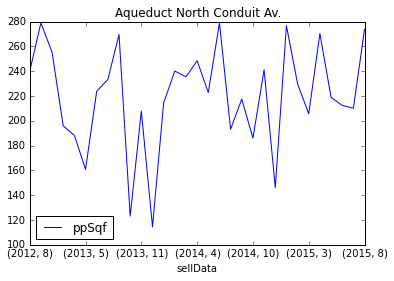

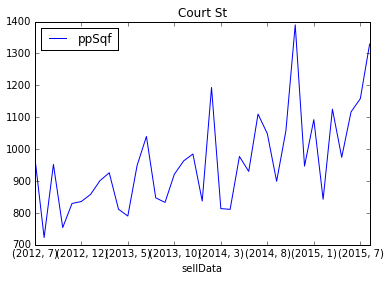

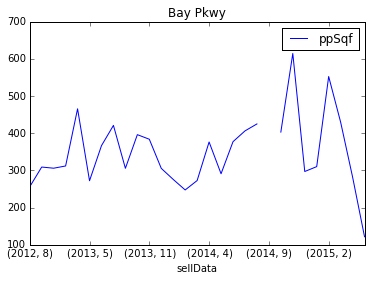

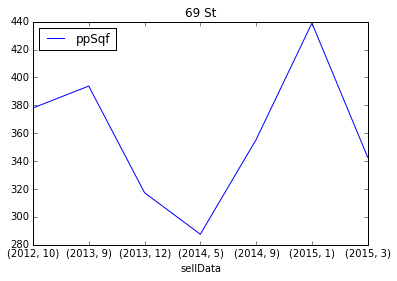

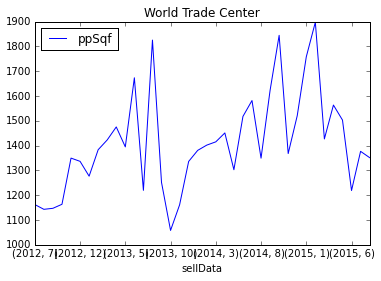

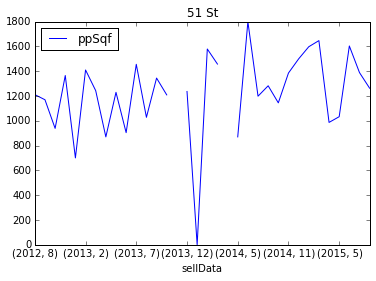

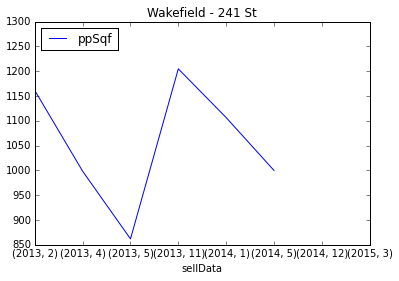

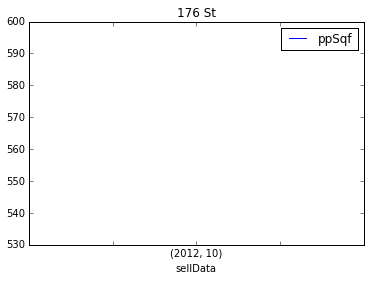

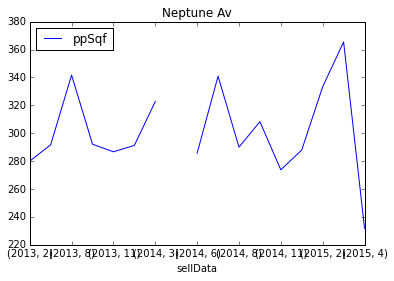

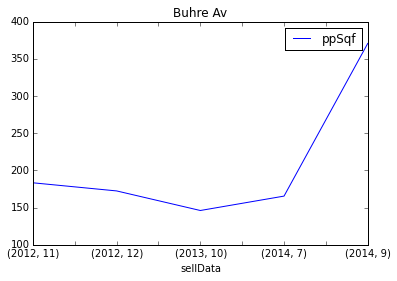

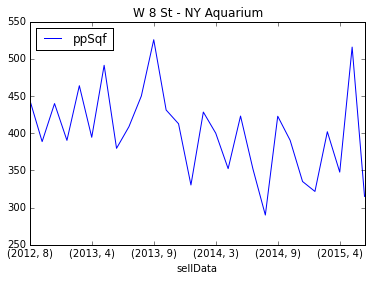

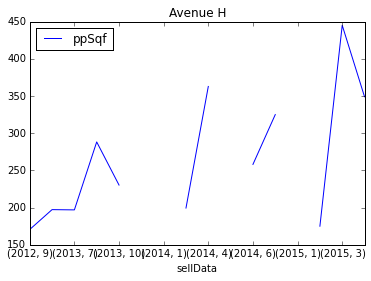

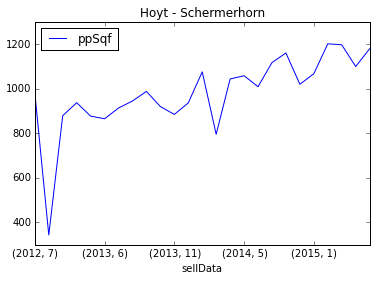

In [28]:
for station in stationFeature.keys():
    stationFeature[station].plot(title = station)

In [29]:
util.pickle_save(stationFeature, 'data/stationFeature.pkl')

In [5]:
listing_info = fulldata[fulldata.columns[:9] + fulldata.columns[-5:]]

stationNameMap = {}

for i, stationName in enumerate(stationColumns):
    stationNameMap[stationName] = i
fulldata.rename(columns=stationNameMap, inplace=True)

from sqlalchemy import create_engine
engine = create_engine('mysql+mysqldb://root@localhost/iApp')
#fulldata.to_sql(con = engine, name = 'firstChunk')
listing_info.drop('geoObj', axis = 1, inplace=True)
listing_info.to_sql(con=engine, name = 'start_listingInfo', if_exists= 'replace')

#doesn't work
for station, feature in stationFeature.iteritems():
    feature.to_sql(con=engine, name = stationNameMap[station], if_exists = 'replace')

/usr/local/lib/python2.7/site-packages/pandas/core/index.py:1338: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  "use '|' or .union()", FutureWarning)
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
print len(fulldata.columns)
print len(listing_info.columns)


1659
13


In [10]:
fulldata.columns


Index([       u'address',      u'bathrooms',       u'bedrooms',
         u'neighborhood',       u'sellData',      u'sellPrice',
                 u'sqft', u'addressToQuery',         u'geoObj',
                       0, 
       ...
                    1895,              1896,              1901,
                    1902,              1903,            u'lon',
                  u'lat',    u'markerColor', u'nearestStation',
                u'ppSqf'],
      dtype='object', length=1659)